## Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.

## Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?



### Observations
Just but looking at the columns, I feel like below are some of the
key features to understand if he requires a personal loan?
- Age and Experience can be key features
- Mortgage - Person Already has a Mortgage.. Is he struggling with personal expenses?
  We can check Family size, Income + ZIP Code, CCAvg
- CCAvg (Avg spending on credit cards) with respect to his income
- Our goal it to target customers that has CD_Account (Certitificate of deposit) 
within the bank. This is an important feature to consider.
- People with Securities_Account use it for long or short term investments 
like stocks, options etc. Will they take Loan and make long term investments? 
This won't happen generally.. but we can check the dependecy of this variable on Loans
- Online - This feature helps us to see if we can do online campaigns for these customers?



### Contents

- [Exploratory Data Analysis ](#data_analysis)
   - [Univariate Analysis ](#univariate) 
   - [Bivariate Analysis ](#bivariate) 

### Import libs

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# for statistical analysis 
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, f1_score
from sklearn.model_selection import GridSearchCV

# For pandas profiling
from pandas_profiling import ProfileReport

### Load data

In [2]:
loan = pd.read_csv("Loan_Modelling.csv")

In [3]:
# helps to keep original copy of data
data = loan.copy()

### ZIP code data

In [4]:
zip_data = pd.read_csv("geo-data.csv")

In [5]:
zip_data

,state_fips,state,state_abbr,zipcode,county,city
0,1,Alabama,AL,35004,St. Clair,Acmar
1,1,Alabama,AL,35005,Jefferson,Adamsville
2,1,Alabama,AL,35006,Jefferson,Adger
3,1,Alabama,AL,35007,Shelby,Keystone
4,1,Alabama,AL,35010,Tallapoosa,New site
...,...,...,...,...,...,...
33098,56,Wyoming,WY,83126,Lincoln,Smoot
33099,56,Wyoming,WY,83127,Lincoln,Thayne
33100,56,Wyoming,WY,83128,Lincoln,Alpine
33101,56,Wyoming,WY,831HH,Lincoln,Zcta 831hh


In [6]:
zip_data.drop(columns=["state_fips", "state_abbr","state","city"], inplace=True, axis=1)

In [7]:
zip_data.head(5)

,zipcode,county
0,35004,St. Clair
1,35005,Jefferson
2,35006,Jefferson
3,35007,Shelby
4,35010,Tallapoosa


In [8]:
zip_data = zip_data.rename(columns={"zipcode": "ZIPCode"})


In [9]:
zip_data["ZIPCode"] = zip_data["ZIPCode"].astype("string")

In [10]:
zip_data.drop_duplicates()

,ZIPCode,county
0,35004,St. Clair
1,35005,Jefferson
2,35006,Jefferson
3,35007,Shelby
4,35010,Tallapoosa
...,...,...
33098,83126,Lincoln
33099,83127,Lincoln
33100,83128,Lincoln
33101,831HH,Lincoln


In [11]:
zip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33103 entries, 0 to 33102
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ZIPCode  33103 non-null  string
 1   county   33103 non-null  object
dtypes: object(1), string(1)
memory usage: 517.4+ KB


In [12]:
zip_data[zip_data["ZIPCode"] == "91107"]

,ZIPCode,county
2090,91107,Los Angeles


### View sample data

In [13]:
data.sample(10, random_state =1)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


### Observations
- ID is not required for our classification problem.
- Personal_Loan is dependent variable
- Column names look OK. No spaces or special characters.
- ZIPCode 

### shape and info of dataset

In [14]:
data.shape

(5000, 14)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Observations
- No missing values
- Personal_Loan should be converted to category.

In [16]:
# convert ZIPCode to string
data["ZIPCode"] = data["ZIPCode"].astype("string")

In [17]:
data["ZIPCode"].unique()

<StringArray>
['91107', '90089', '94720', '94112', '91330', '92121', '91711', '93943',
 '93023', '94710',
 ...
 '96145', '94703', '96094', '95842', '94116', '90068', '94970', '90813',
 '94404', '94598']
Length: 467, dtype: string

In [18]:
# convert Personal_Loan to Category
data["Personal_Loan"] = data["Personal_Loan"].astype("category")
# drop ID
data.drop("ID", axis=1, inplace=True)

<a id='univariate'></a>

In [19]:
### Merge zipcode and bank data on zipcode and obtaining county values. This will reduce the number of categories interms of zipcode
merged_df = data.merge( zip_data, on="ZIPCode", how="inner")
merged_df.head(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,county
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles
1,30,4,60,91107,4,2.2,2,0,0,0,0,1,0,Los Angeles
2,35,10,200,91107,2,3.0,1,458,0,0,0,0,0,Los Angeles
3,54,30,93,91107,1,2.7,2,0,0,0,0,1,0,Los Angeles
4,37,12,169,91107,2,5.2,3,249,1,0,0,1,0,Los Angeles


In [20]:
merged_df["county"].unique()

array(['Los Angeles', 'San Francisco', 'San Diego', 'Ventura', 'Alameda',
       'Marin', 'Santa Clara', 'Santa Cruz', 'San Mateo', 'Humboldt',
       'Contra Costa', 'Orange', 'Sacramento', 'Yolo', 'Placer',
       'San Bernardino', 'Monterey', 'Riverside', 'Kern', 'Fresno',
       'Sonoma', 'Santa Barbara', 'El Dorado', 'San Benito', 'Solano',
       'Mendocino', 'San Joaquin', 'Imperial', 'Siskiyou', 'Merced',
       'Trinity', 'Butte', 'Stanislaus', 'San Luis Obispo', 'Shasta',
       'Tuolumne', 'Napa', 'Lake'], dtype=object)

In [21]:
# drop ZIPCode, will use county instead
merged_df.drop("ZIPCode", axis=1, inplace=True)
data=merged_df

### Univariate Analysis

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3960.0,45.308333,11.479630,23.0,35.0,45.0,55.0,67.0
Experience,3960.0,20.085354,11.472968,-3.0,10.0,20.0,30.0,43.0
Income,3960.0,73.980556,45.909615,8.0,39.0,64.0,98.0,224.0
Family,3960.0,2.392677,1.149408,1.0,1.0,2.0,3.0,4.0
CCAvg,3960.0,1.946295,1.749688,0.0,0.7,1.5,2.6,10.0
Education,3960.0,1.873737,0.839308,1.0,1.0,2.0,3.0,3.0
Mortgage,3960.0,56.785354,102.432935,0.0,0.0,0.0,101.0,635.0
Securities_Account,3960.0,0.102525,0.303376,0.0,0.0,0.0,0.0,1.0
CD_Account,3960.0,0.059343,0.236296,0.0,0.0,0.0,0.0,1.0
Online,3960.0,0.598485,0.490267,0.0,0.0,1.0,1.0,1.0


In [23]:
data["Education"] = data["Education"].replace({1:  "Undergrad", 2: "Graduate", 3: "Advanced/Professional"})

#### Observations
- Experience has negative min value, which is not correct
- Family, Education, Securities_Account, CD_Account, Online and CreditCard should be categorical value
- Minimum CCAvg which is credit card spending compared to Income is 0. There might be some customers who don't use credit cards at all.
- 50% of customers don't have Mortgage


In [24]:
def convert_to_category(col):
   data[col] = data[col].astype("category")

for col in ["Family", "Education", "Securities_Account", "CD_Account", "Online", "CreditCard", "county"]:
    convert_to_category(col)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3960 entries, 0 to 3959
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 3960 non-null   int64   
 1   Experience          3960 non-null   int64   
 2   Income              3960 non-null   int64   
 3   Family              3960 non-null   category
 4   CCAvg               3960 non-null   float64 
 5   Education           3960 non-null   category
 6   Mortgage            3960 non-null   int64   
 7   Personal_Loan       3960 non-null   category
 8   Securities_Account  3960 non-null   category
 9   CD_Account          3960 non-null   category
 10  Online              3960 non-null   category
 11  CreditCard          3960 non-null   category
 12  county              3960 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 218.9 KB


### Checking the count of categorical columns

In [25]:
# Making a list of all catrgorical variables
cat_col = data.select_dtypes(include="category")

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

1    1175
2    1023
4     968
3     794
Name: Family, dtype: int64
----------------------------------------
Undergrad                1676
Advanced/Professional    1176
Graduate                 1108
Name: Education, dtype: int64
----------------------------------------
0    3593
1     367
Name: Personal_Loan, dtype: int64
----------------------------------------
0    3554
1     406
Name: Securities_Account, dtype: int64
----------------------------------------
0    3725
1     235
Name: CD_Account, dtype: int64
----------------------------------------
1    2370
0    1590
Name: Online, dtype: int64
----------------------------------------
0    2797
1    1163
Name: CreditCard, dtype: int64
----------------------------------------
Los Angeles        823
Santa Clara        507
San Diego          432
Alameda            310
Orange             306
San Francisco      216
San Mateo          204
Sacramento         167
Yolo               125
Ventura            110
San Bernardino      97
Contra Cost

### Observations
- Customers who did not take Personal_Loan are 10 times greater than those who took it. 
  Same thing with Securities_Account and CD_Account. That means in order to gain more interests
  we can increase our customers in all three features.
- Nearly half of the customers have credit cards from different banks. 
- Top 5 county's for our customers are Los Angeles, Santa Clara, San Diego, Alameda and Orange      
    

### Histograms and boxplot

### code Ref: From academy notebooks

In [26]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    ax_box2.set_title(feature.name, fontsize=20)
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=True, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Age

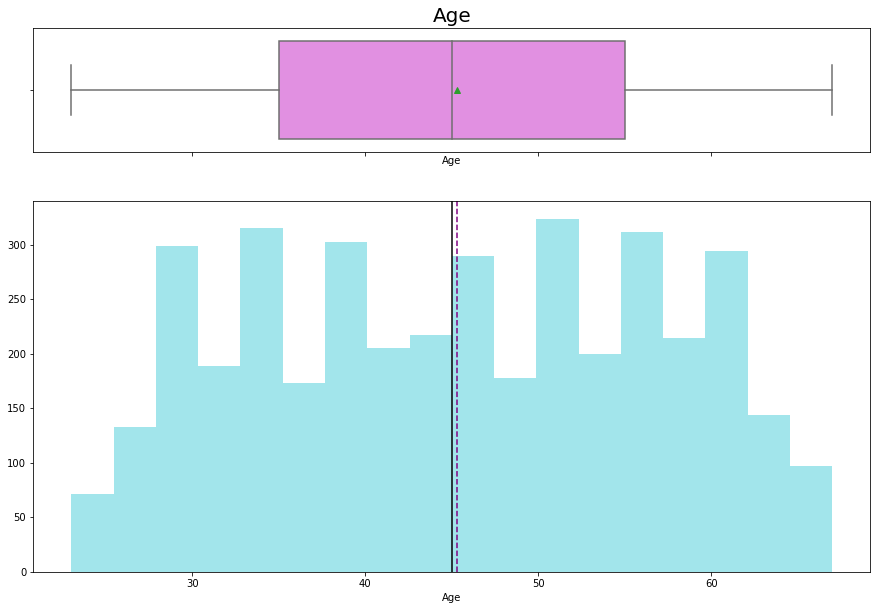

In [104]:
histogram_boxplot(data.Age)

### Observations
- The distribution looks normal with several peaks/modes. But age of customers range from 25 to 67 years. 

### Income

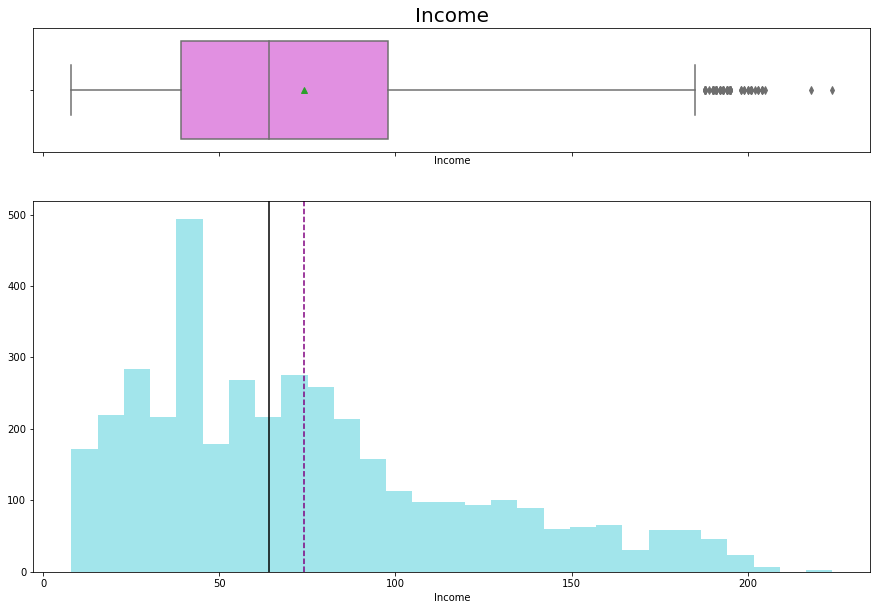

In [29]:
histogram_boxplot(data.Income)

### Observations
- Income is slightly right skewed. Is this correlated to Education or Experience? 
- Majority or customers have income < 50 thousand dollares


### Experience

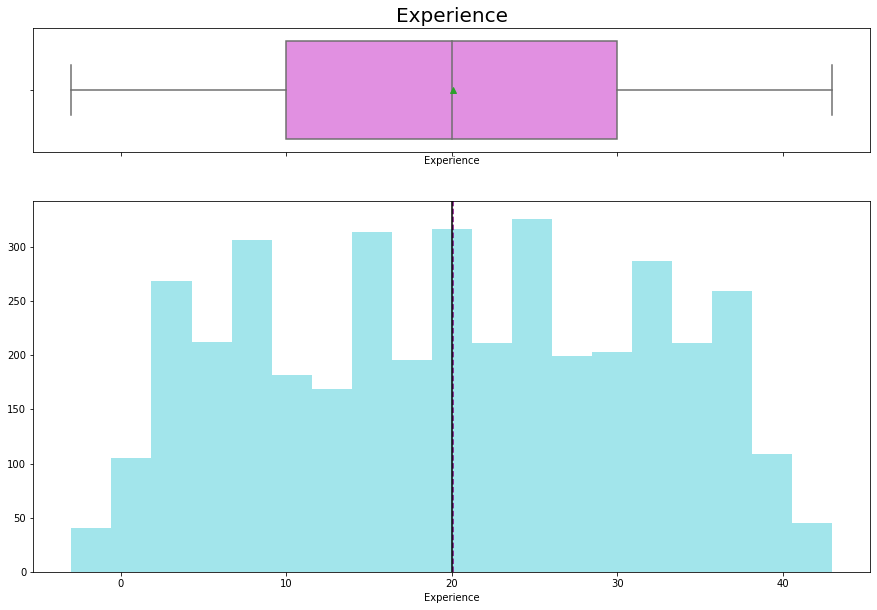

In [30]:
histogram_boxplot(data.Experience)

### Observations
- There is a negative experience which is wrong. This requires data cleaning
- The median experience in yeares is 20

### CCAvg

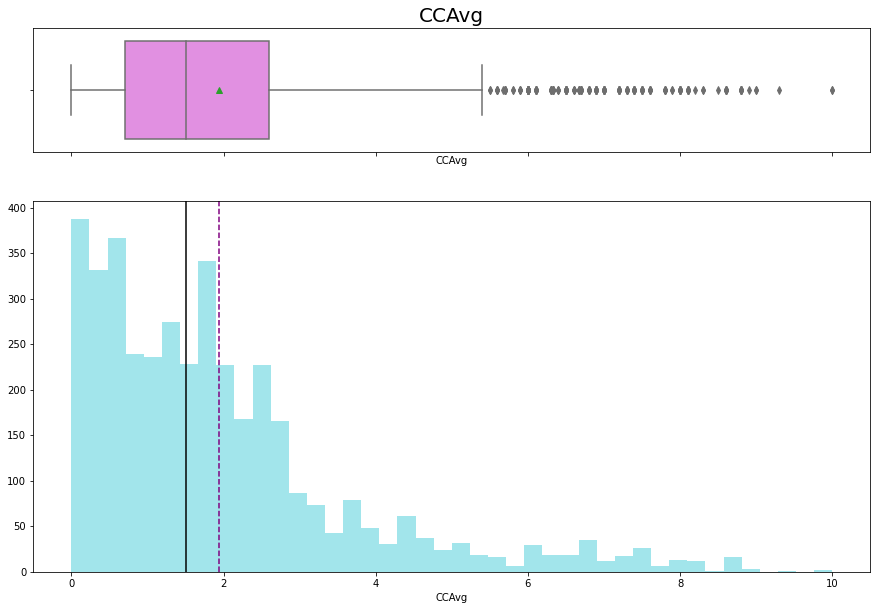

In [31]:
histogram_boxplot(data.CCAvg)

### Observations
- Average spending per month in thousand dollars on credit cards is right skewed with majority of customers spending between 0 to 2 thousands.

### Mortgage

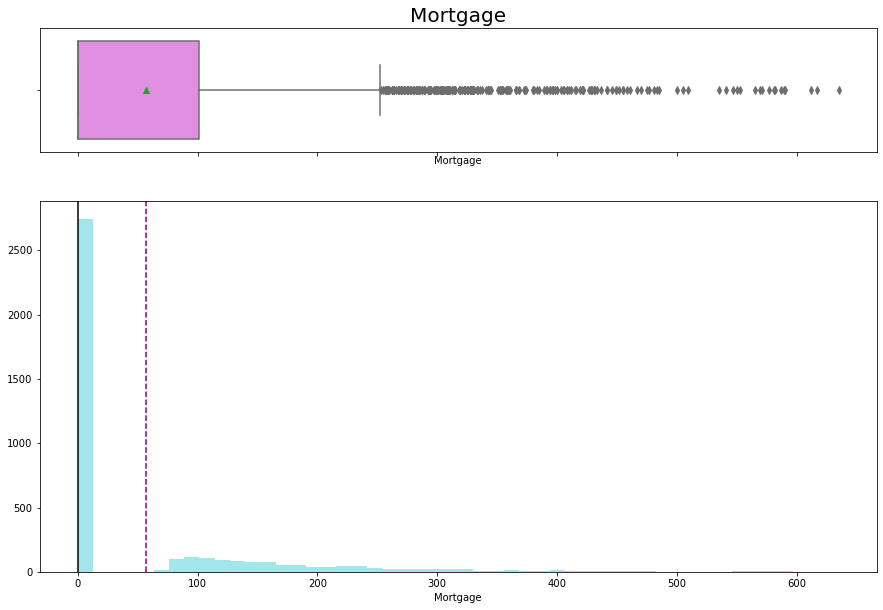

In [32]:
histogram_boxplot(data.Mortgage)

### Observations
- There are many people who did not take Mortgage. This is why it looks like the data is skewed and had a lot of outliers. This requires transformation of data.

In [110]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    #plt.xticks(rotation=45)
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Personal Loan

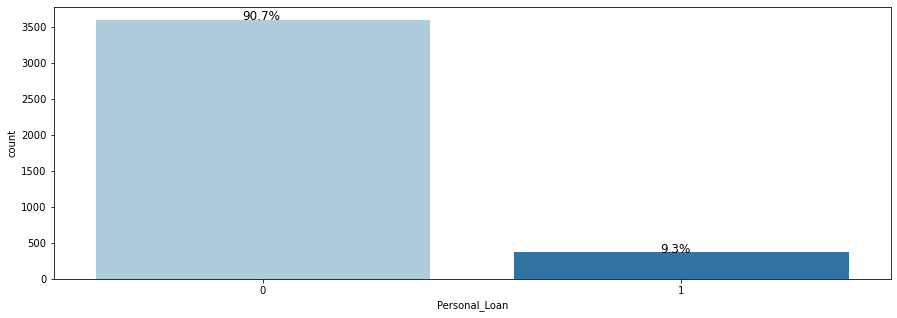

In [111]:
perc_on_bar('Personal_Loan')

### Observations
- This is an unbalanced classifications. Around 90% of the customers won't take Personal Loan.

### Family

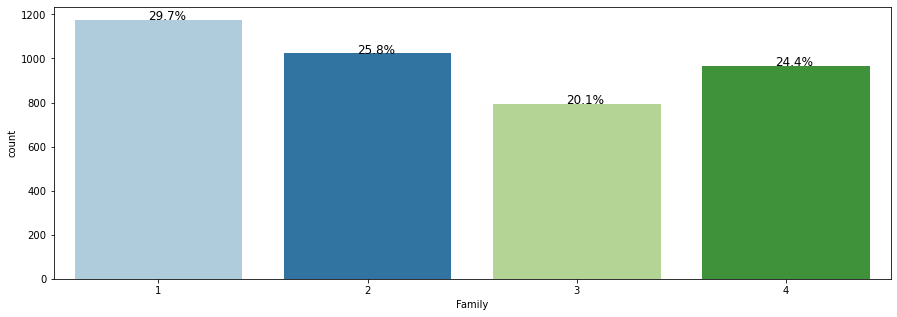

In [34]:
perc_on_bar('Family')

### Observations
- Not much difference is observed here. However there are fewer customers with 3 family memebers when compared to others.

### Education

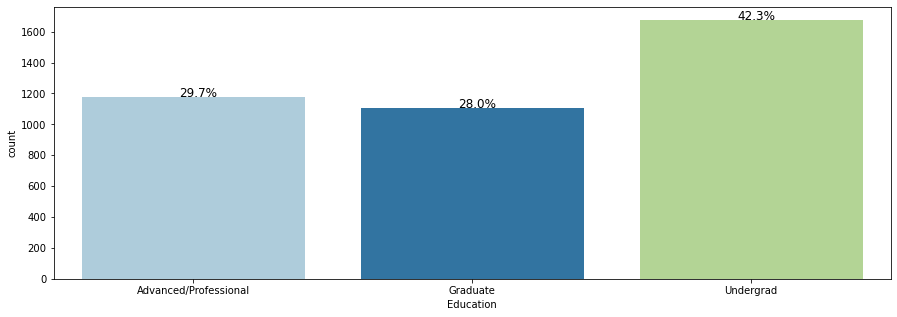

In [35]:
perc_on_bar('Education')

### Observations
- There are more undergraduates customers when compared to graduated and other advanced professionals.

### county

In [26]:
top_10_countys = data['county'].value_counts().sort_values(ascending=False).head(10)
top_10_countys

Los Angeles      823
Santa Clara      507
San Diego        432
Alameda          310
Orange           306
San Francisco    216
San Mateo        204
Sacramento       167
Yolo             125
Ventura          110
Name: county, dtype: int64

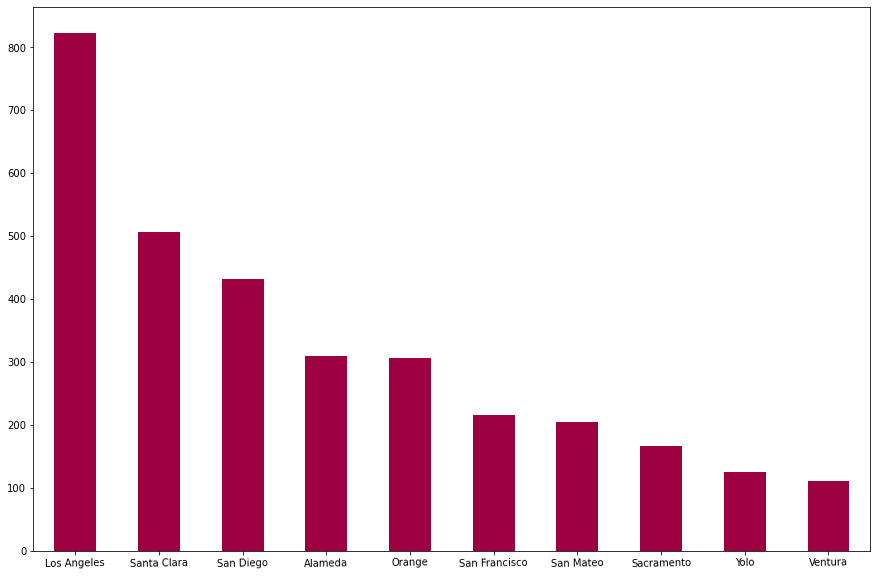

In [27]:
top_10_countys.plot(kind="bar", colormap='Spectral', rot=1,figsize=(15,10));

### Observations
- Top 10 customers from different countys in California are listed above. We can targe the customers from those countys.

### Bivariate Analysis

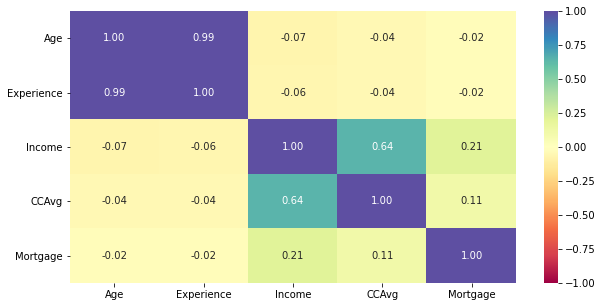

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

### Observations
- Age and Experience are higly correlated. Higher the Age, higher the Experience would be. 
- Income and CCAvg are positively correlated. This makes sense because when a person has higher Income he can spend more.

In [52]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['Personal_Loan'],margins=True).sort_values(by=0,ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['Personal_Loan'],normalize='index').sort_values(by=0,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
#     plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### Personal_Loan vrs Family

Personal_Loan     0    1   All
Family                        
All            3593  367  3960
1              1098   77  1175
2               935   88  1023
4               869   99   968
3               691  103   794
------------------------------------------------------------------------------------------------------------------------


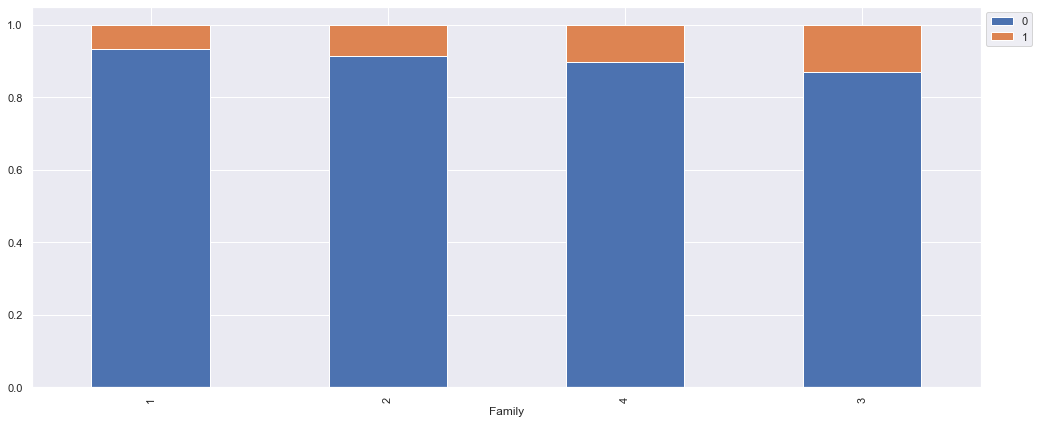

In [54]:
stacked_plot(data["Family"])

### Observations
- Customers with 1 person in the Family tend to take less Personal Loans than others.

### Personal_Loan vrs Education

Personal_Loan             0    1   All
Education                             
All                    3593  367  3960
Undergrad              1610   66  1676
Advanced/Professional  1022  154  1176
Graduate                961  147  1108
------------------------------------------------------------------------------------------------------------------------


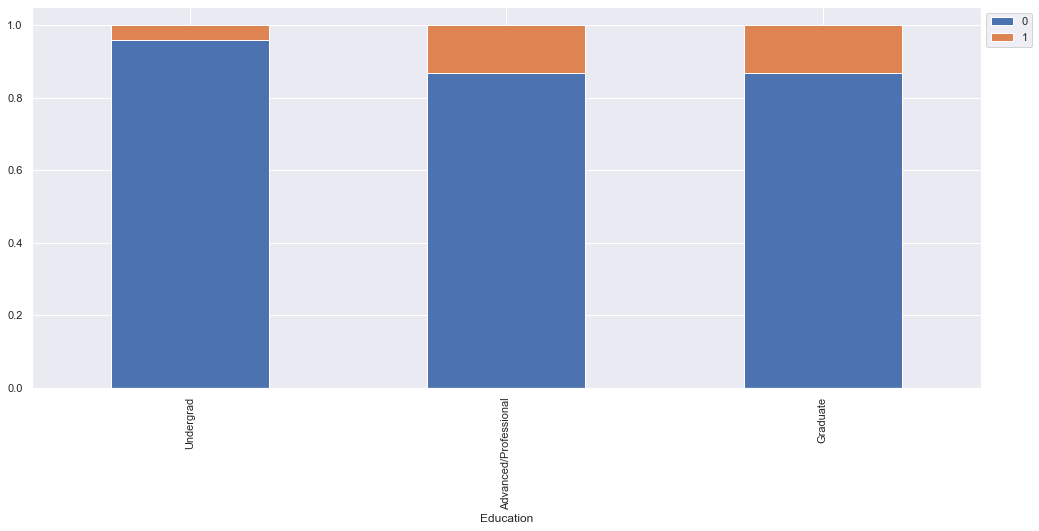

In [55]:
stacked_plot(data["Education"])

### Observations
- Interestingly undergraduates take less Personal loan than others. 

### Personal_Loan vrs Family

Personal_Loan          0    1   All
Securities_Account                 
All                 3593  367  3960
0                   3233  321  3554
1                    360   46   406
------------------------------------------------------------------------------------------------------------------------


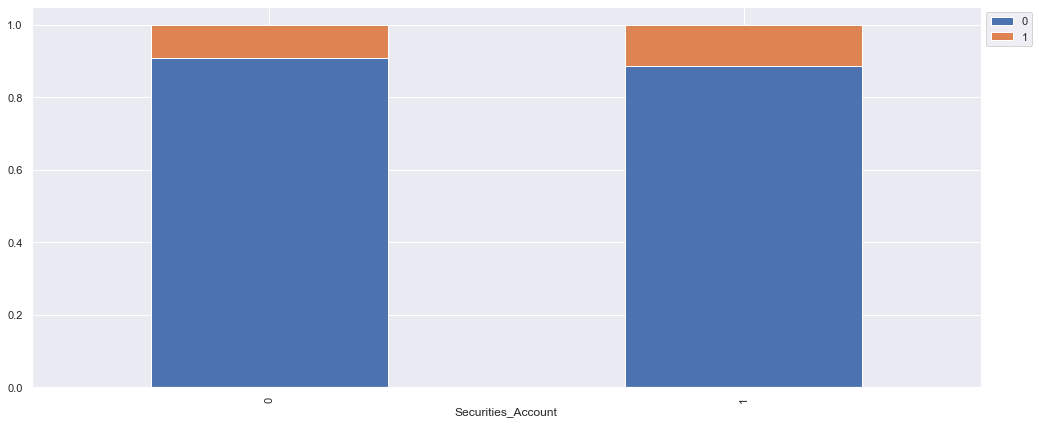

In [56]:
stacked_plot(data["Securities_Account"])

### Observations
- Not much difference here. Securities_Account won't have any influence on Personal_Loans.

### Personal_Loan vrs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            3593  367  3960
0              3465  260  3725
1               128  107   235
------------------------------------------------------------------------------------------------------------------------


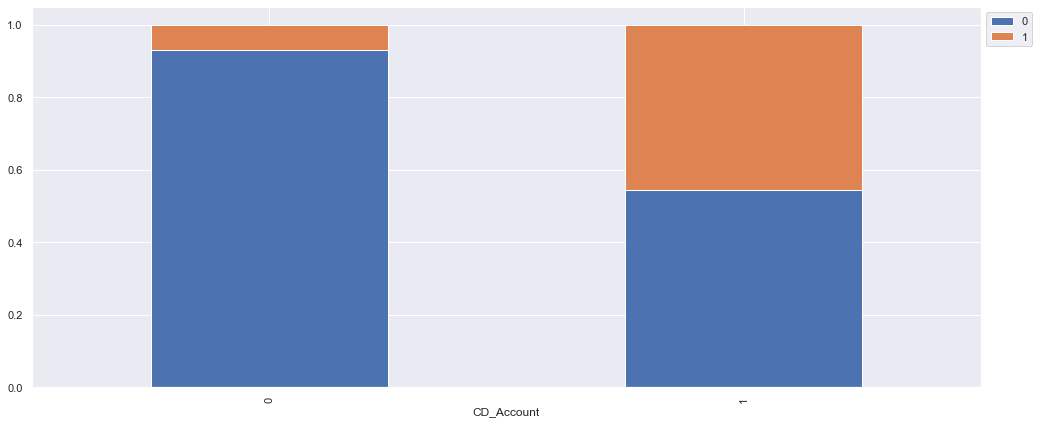

In [80]:
stacked_plot(data["CD_Account"])

### Observations
- People with CD_Account have a greater chance of taking Personal_Loan. 

### Personal_Loan vrs Online

Personal_Loan     0    1   All
Online                        
All            3593  367  3960
1              2142  228  2370
0              1451  139  1590
------------------------------------------------------------------------------------------------------------------------


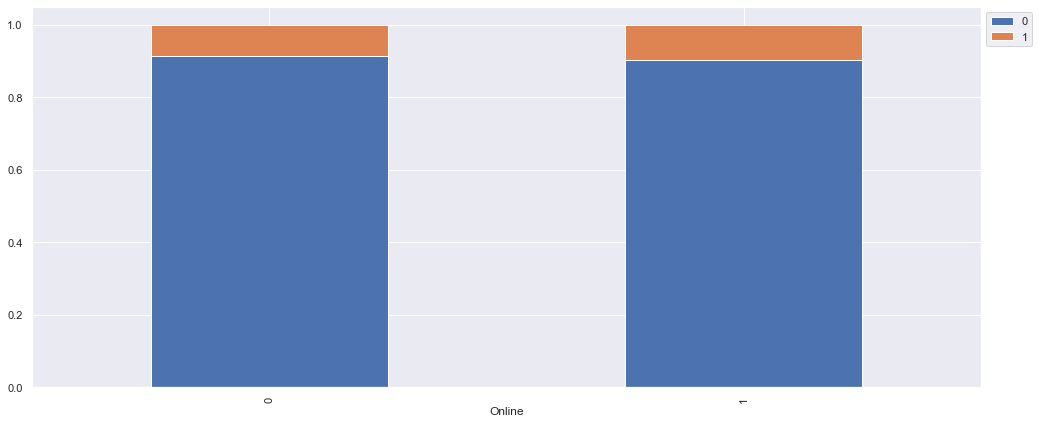

In [82]:
stacked_plot(data["Online"])

### Observations
- Not much difference here.

### Personal_Loan vrs CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            3593  367  3960
0              2537  260  2797
1              1056  107  1163
------------------------------------------------------------------------------------------------------------------------


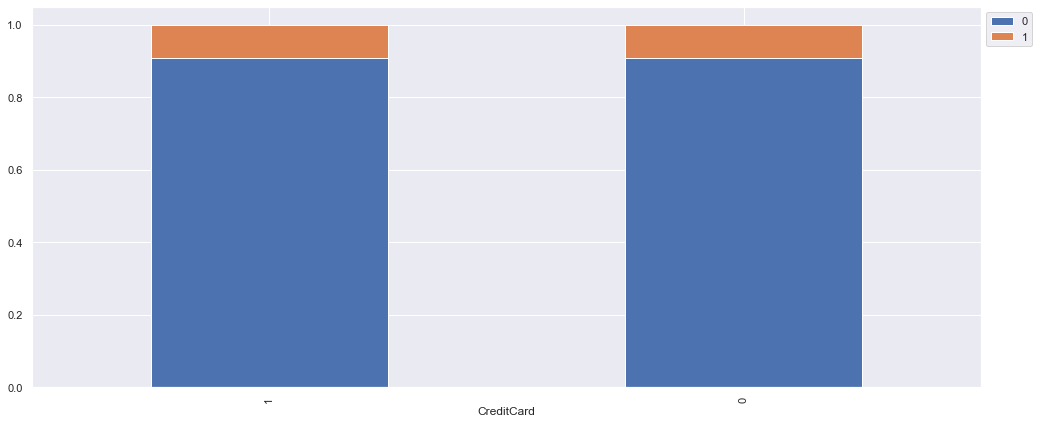

In [83]:
stacked_plot(data["CreditCard"])

### Observations
- Not much difference here.

### Personal_Loan vrs county

In [27]:
top_10_countys = data['county'].value_counts().sort_values(ascending=False).head(20)
top_10_countys

Los Angeles       823
Santa Clara       507
San Diego         432
Alameda           310
Orange            306
San Francisco     216
San Mateo         204
Sacramento        167
Yolo              125
Ventura           110
San Bernardino     97
Contra Costa       83
Santa Barbara      75
Monterey           74
Santa Cruz         68
Kern               44
Marin              44
Humboldt           29
Sonoma             28
Solano             26
Name: county, dtype: int64

In [28]:
top_10_name = list(top_10_countys.index)
top_10_name

['Los Angeles',
 'Santa Clara',
 'San Diego',
 'Alameda',
 'Orange',
 'San Francisco',
 'San Mateo',
 'Sacramento',
 'Yolo',
 'Ventura',
 'San Bernardino',
 'Contra Costa',
 'Santa Barbara',
 'Monterey',
 'Santa Cruz',
 'Kern',
 'Marin',
 'Humboldt',
 'Sonoma',
 'Solano']

Personal_Loan      0    1   All
county                         
All             3415  353  3768
Los Angeles      743   80   823
Santa Clara      441   66   507
San Diego        395   37   432
Alameda          286   24   310
Orange           280   26   306
San Francisco    200   16   216
San Mateo        192   12   204
Sacramento       154   13   167
Yolo             117    8   125
Ventura           99   11   110
San Bernardino    94    3    97
Contra Costa      71   12    83
Santa Barbara     70    5    75
Monterey          63   11    74
Santa Cruz        60    8    68
Marin             39    5    44
Kern              38    6    44
Humboldt          27    2    29
Solano            24    2    26
Sonoma            22    6    28
------------------------------------------------------------------------------------------------------------------------


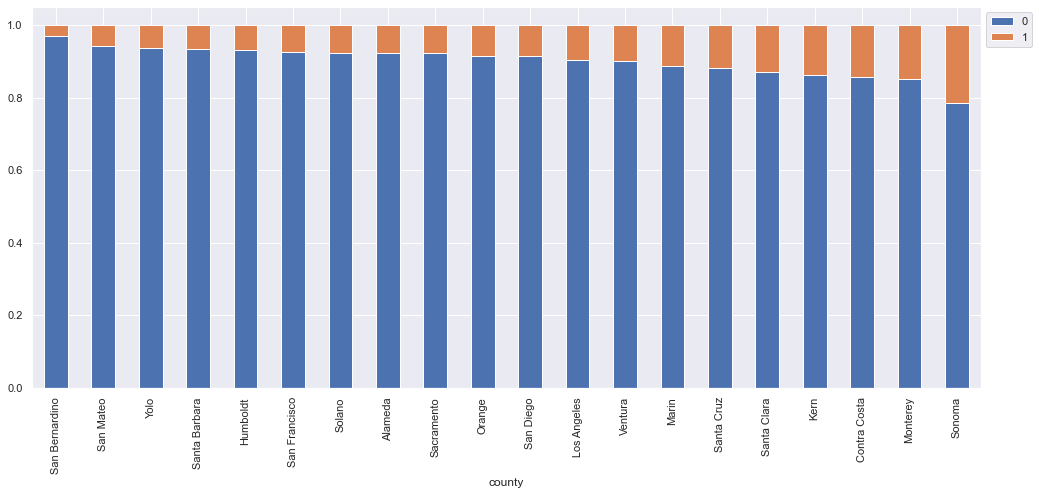

In [29]:
county_data = data.loc[data["county"].isin(top_10_name)]
sns.set()
## crosstab 
tab1 = pd.crosstab(county_data['county'],county_data['Personal_Loan'],margins=True).sort_values(by=0,ascending=False)
print(tab1)
print('-'*120)
## visualising the cross tab
tab = pd.crosstab(county_data['county'],county_data['Personal_Loan'],normalize='index').sort_values(by=0,ascending=False)
tab.plot(kind='bar',stacked=True,figsize=(17,7))
#     plt.legend(loc='lower left', frameon=False,)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

### Observations
- Overall trend looks like many customers did not opt for Personal Loans. However few countys did better than others but it is not that significant.

In [101]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='Personal_Loan'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title(f'Distribution of {x} of people WITHOUT Personal_Loan',fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x} of people WITH Personal_Loan",fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == 1)][x],ax=axs[0,1],color='orange')
       
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
   
    axs[1,0].set_title(f'Boxplot of {x} w.r.t Personal_Loan',fontsize=12,fontweight='bold')
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t Personal_Loan - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    plt.tight_layout(pad=4)
    plt.show()

### Personal_Loan vrs Age

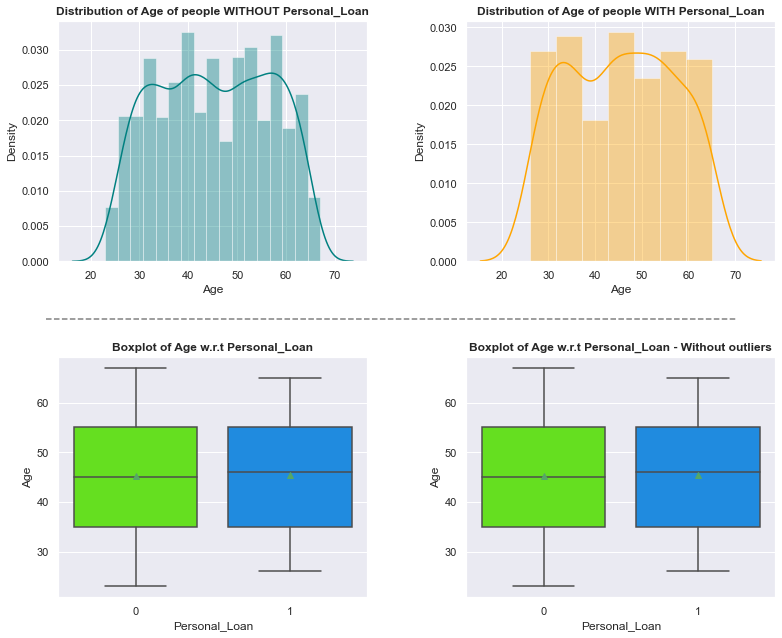

In [102]:
plot('Age')

### Observations
- Looks like Age is not a significant contributer for Personal loan.

In [95]:
### Personal_Loan vrs Experience

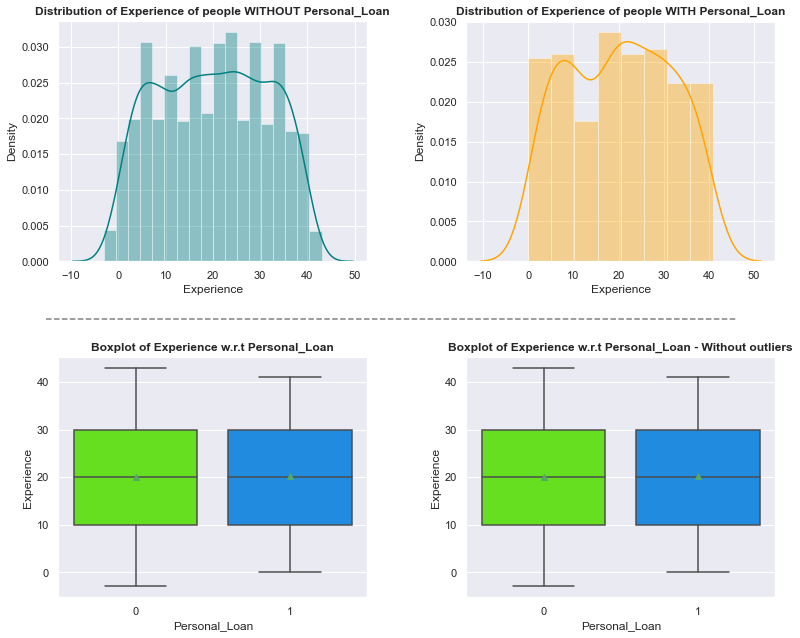

In [96]:
plot("Experience")

### Observations
- Experience is not a significant contributer for Personal Loan

In [ ]:
### Personal_Loan vrs Income

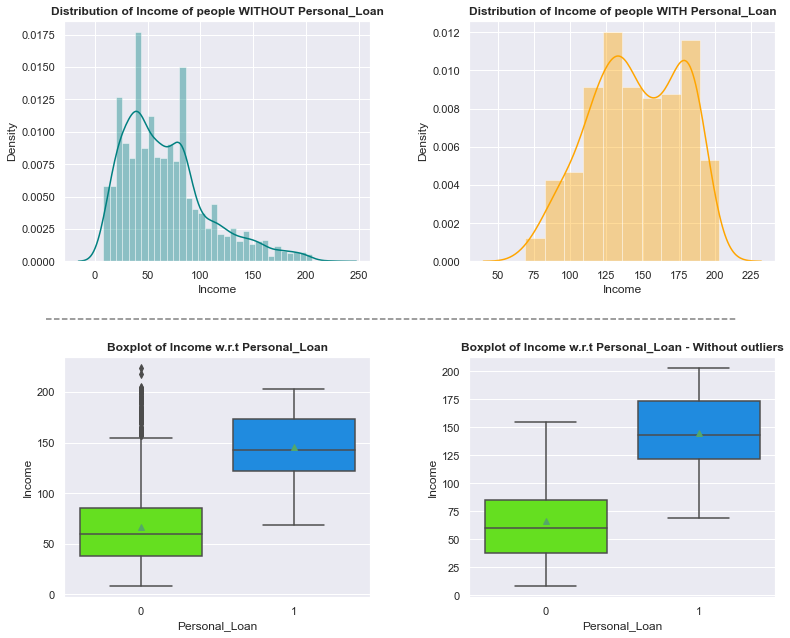

In [103]:
plot("Income")

### Observations
- People with higher Income take more Personal Loan. Is it beacuse they can easily repay it? This is similar to Credit card spending.

### Personal_Loan vrs CCAvg

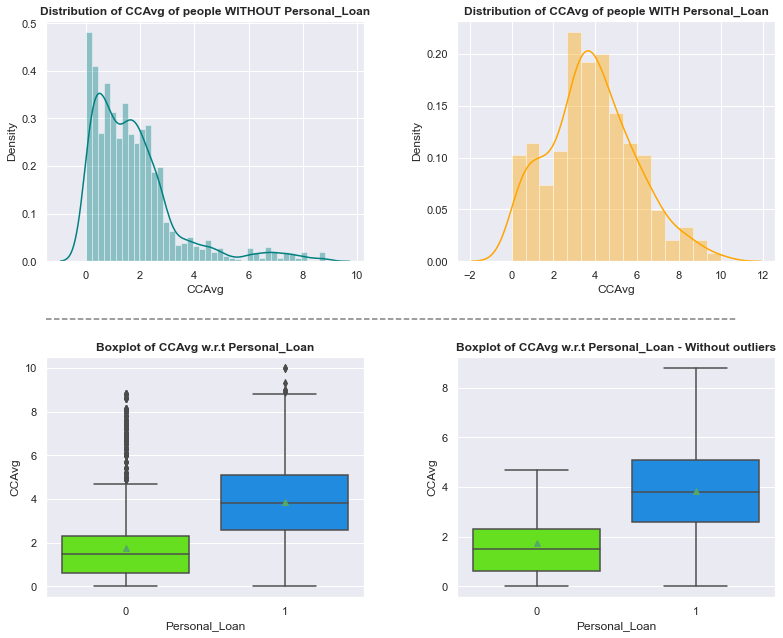

In [104]:
plot("CCAvg")

### Observations
- People with higher credit card usage take more personal loan.

### Personal_Loan vrs Mortgage

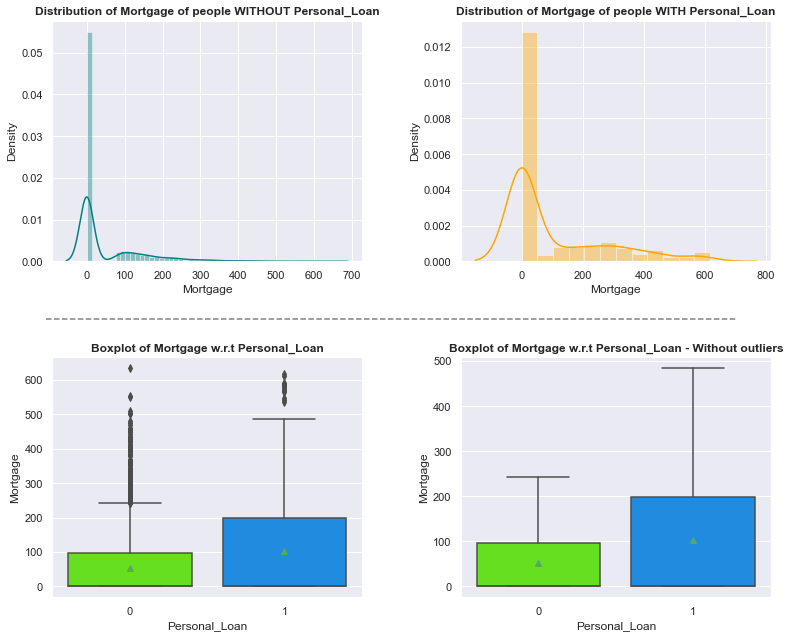

In [105]:
plot("Mortgage")

### Observations
- People with higher Mortgage tend to take more Personal Loan.

### Income vrs CCAvg vrs Personal_Loan

In [151]:
def plot_scatter(x, y, hue):
    plt.figure(figsize=(15,8))
    sns.scatterplot(x=data[x], y=data[y],palette='gist_rainbow', hue=data[hue]);

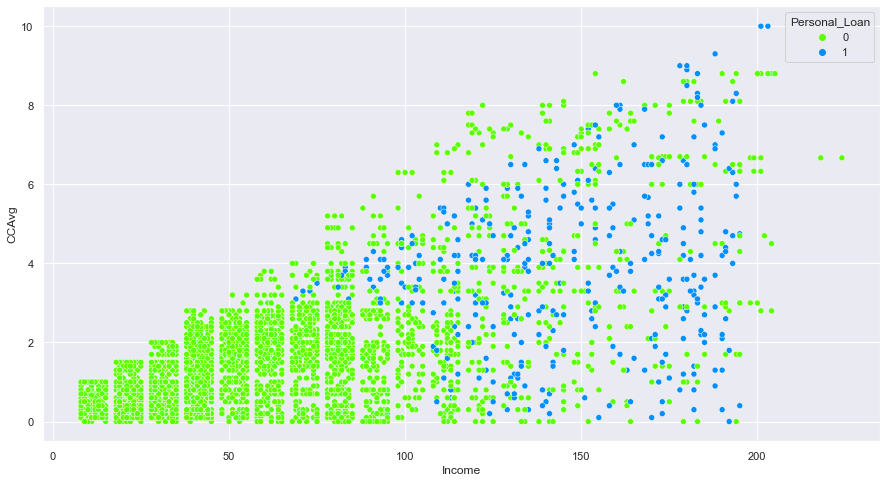

In [152]:
plot_scatter("Income","CCAvg","Personal_Loan");

### Observations
- There is a linear relationship between Income and Credit card spending. As the income increases, people tend to spend more on credit cards.
- It is also clear from the above plot that, people with higher Income takes more Personal Loan. These people can be targetted on campaigns

In [ ]:
### CD_Account

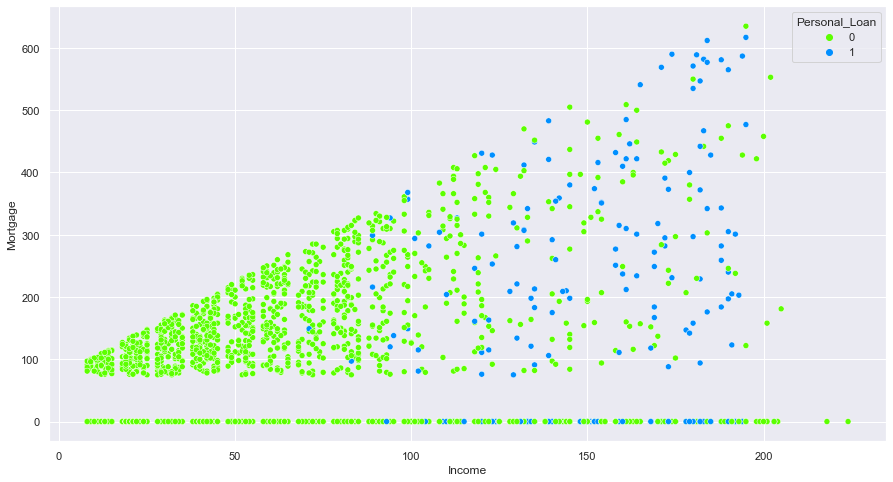

In [153]:
plot_scatter("Income","Mortgage","Personal_Loan");

### Observations
- There is a linear relationship between Income and Mortgage spending. As the income increases, people tend to take higher Mortgage.
- It is also clear from the above plot that, people with higher Mortgage takes more Personal Loan.

### Mortgage vrs Personal_Loan

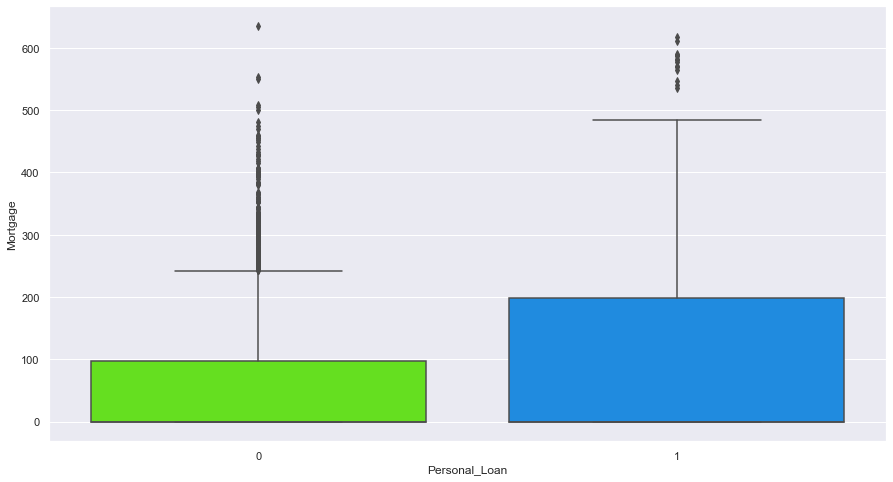

In [168]:
plt.figure(figsize=(15,8))
sns.boxplot( data=data, x="Personal_Loan", y="Mortgage",palette='gist_rainbow');
    

### Observations
- People with higher Mortgage takes more Personal Loan.

## Data Pre-Processing

### Identify outliers

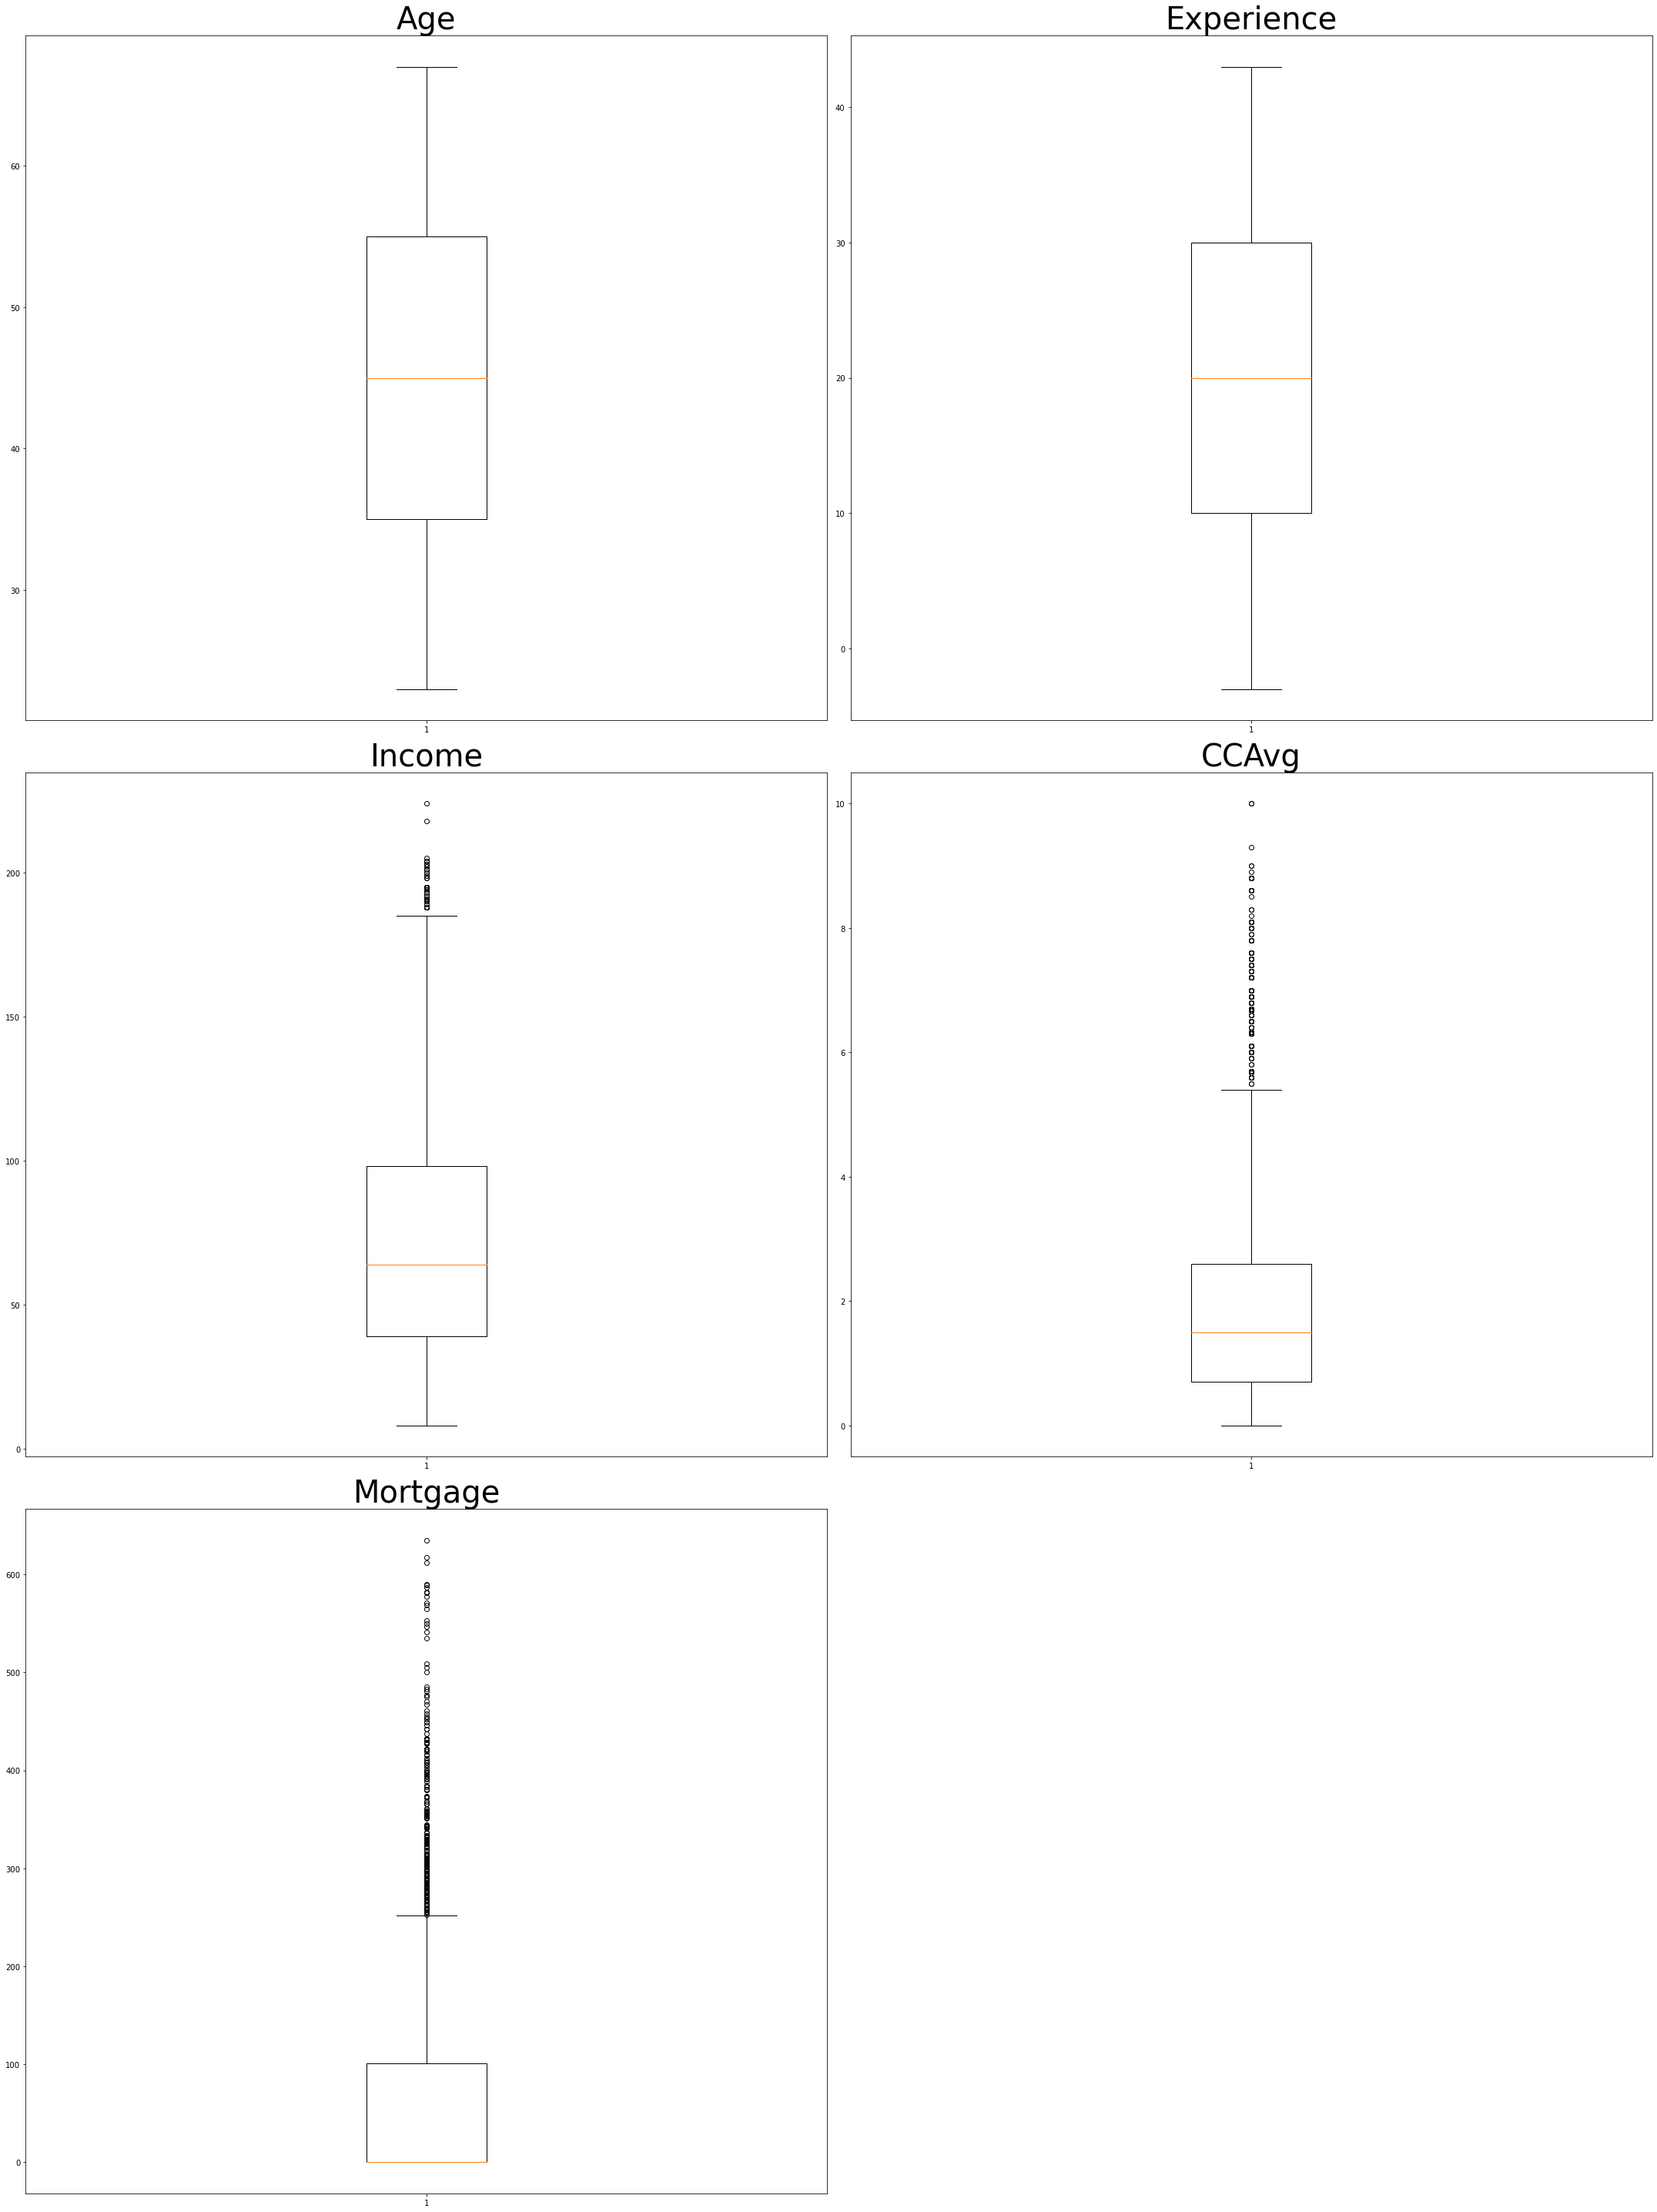

In [26]:
# outlier detection using boxplot
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(30,40))

for i, variable in enumerate(numerical_col):
                     plt.subplot(3,2,i+1)
                     plt.boxplot(data[variable])
                     plt.tight_layout()
                     plt.title(variable, fontdict={"fontsize":40})

plt.show()

### Observations
- Outliers are observed in  Income, CCAvg and Mortgage. Out of which only Mortgage plot looks distorted due to outliers. 
- I will not treat Income and CCAvg since there are few outliers.

In [27]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whisker will be assigned value of upper_Whisker 
    return data

# Treat outliers only for Mortgage
treat_outliers(data, "Mortgage")

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,county
0,25,1,49,4,1.6,Undergrad,0.0,0,1,0,0,0,Los Angeles
1,30,4,60,4,2.2,Graduate,0.0,0,0,0,1,0,Los Angeles
2,35,10,200,2,3.0,Undergrad,252.5,0,0,0,0,0,Los Angeles
3,54,30,93,1,2.7,Graduate,0.0,0,0,0,1,0,Los Angeles
4,37,12,169,2,5.2,Advanced/Professional,249.0,1,0,0,1,0,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,27,0,40,1,2.0,Graduate,110.0,0,0,0,0,1,Los Angeles
3956,45,21,33,3,0.5,Undergrad,136.0,0,0,1,1,1,Marin
3957,50,25,45,2,0.6,Advanced/Professional,0.0,0,0,0,0,0,Los Angeles
3958,34,10,88,2,0.0,Undergrad,121.0,0,0,0,1,0,San Mateo


### Look for missing data

In [28]:
pd.isna(data).sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
county                0
dtype: int64

### Observations
- There is no missing data. We got the same observations with data.info()

### Data Preparation

Logistic Regression wont work with multi colinearity. 
From correlation metrics we know that 
- Age and Experience are highly correlated. I would drop Experience column
- Income and CCAvg are higly correlated. I would subtract (CCAvg*12) from Income to give me net Income Anually.

In [29]:
# drop Experience
data.drop(columns=["Experience"], axis=1, inplace=True)
# calculate net Income Annually. 
data["Income"] = data["Income"] - (data["CCAvg"]*12)

In [30]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,county
0,25,29.8,4,1.6,Undergrad,0.0,0,1,0,0,0,Los Angeles
1,30,33.6,4,2.2,Graduate,0.0,0,0,0,1,0,Los Angeles
2,35,164.0,2,3.0,Undergrad,252.5,0,0,0,0,0,Los Angeles
3,54,60.6,1,2.7,Graduate,0.0,0,0,0,1,0,Los Angeles
4,37,106.6,2,5.2,Advanced/Professional,249.0,1,0,0,1,0,Los Angeles


In [31]:
data_for_decision_tree = data

In [32]:
X = data.drop(['Personal_Loan'], axis=1)
Y = data['Personal_Loan']

X = pd.get_dummies(X,drop_first=True)

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)

### Building Model

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a person takes Personal_Loan and but actually he doesn't.
2. Predicting a person doesn't take Personal_Loan but actually he does.

### Which case is more important? 

- Case1: If we predict a person takes Personal_Loan that person and he doesn't. This will not cause any loss to the bank. We can always try for the next time.

- Case2: If we predict a person doesn't take Personal_Loan and he actually does. If we don't grab that opportunity and someone else take it, it is a loss for the bank.

- So Case2 is more important that Case1. We should reduce False Negative (Recall)

### How to reduce this loss i.e need to reduce False Negatives?
*  We should reduce False Negatives. That means Recall score should be higher.

### Steps
- build model
- fit data
- run it on training data
- calculate scores
- verify the scores on testing data
- Check confusion matrix
- Create Precision-Recall curve and find optimal threshold
- Use Feature selection to verify the optimal threshold value
- Create ROC curve

In [86]:
import pprint
# Predict and score the model. Can be used on training and testing data
# Prints the score
def predict_and_score( X_data, y_true_data, y_predicted_data, score_d, print_confusion_matrix=False):
    score_d["accuracy"] = accuracy_score(y_true_data, y_predicted_data)
    score_d["recall"] = recall_score(y_true_data, y_predicted_data)
    score_d["precision"] = precision_score(y_true_data, y_predicted_data)
    score_d["f1_score"] = f1_score(y_true_data, y_predicted_data)
    
    if print_confusion_matrix:
        cnf_matrix = confusion_matrix(y_true_data, y_predicted_data, labels=[0, 1])
        cnf_df = pd.DataFrame(cnf_matrix, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
        # Arrarge columns with Positive followed by negative
        cnf_df = cnf_df[["Predicted - Yes",'Predicted - No']]
        # Arrage index with Positive followed by negative
        cnf_df = cnf_df.loc[["Actual - Yes","Actual - No"], :]
        print(cnf_df.T)
        sns.heatmap(cnf_df.T, annot=True, cmap="YlGnBu", fmt="g")
        plt.xlabel('True label')
        plt.ylabel('Predicted label')

                 Actual - Yes  Actual - No
Predicted - Yes            82           17
Predicted - No             27         1062
{'test': {'accuracy': 0.9629629629629629,
          'f1_score': 0.7884615384615384,
          'precision': 0.8282828282828283,
          'recall': 0.7522935779816514},
 'train': {'accuracy': 0.9585137085137085,
           'f1_score': 0.7558386411889597,
           'precision': 0.8356807511737089,
           'recall': 0.689922480620155}}


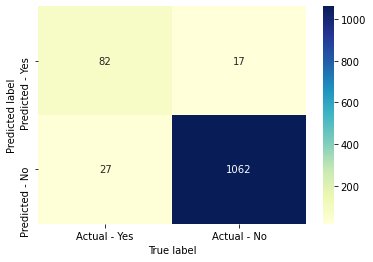

In [87]:
# build model and fit data with default threshold=0.5
model = LogisticRegression(random_state=1)
lg = model.fit(X_train,y_train)

# get scrores and print
score_d={"threshold_0.5": {"train": {}, "test": {}} }
predict_and_score( X_train, y_train, model.predict(X_train), score_d["threshold_0.5"]["train"])
predict_and_score( X_test, y_test, model.predict(X_test), score_d["threshold_0.5"]["test"], 
                  print_confusion_matrix=True)
pprint.pprint(score_d["threshold_0.5"])


### Observations
- From the confusion matrix we observe that TP=82, FP=17, FN=27 and TN=1062.
- Our aim is to reduce FN or increase recall score. Looks like test data performed well in terms of recall score. Score increased from 0.69 to 0.75

### Let's plot ROC curve which is another metrics for Logestice regression

In [39]:
def plot_roc(fpr, tpr, y_data, predicted_probabilty, type="train"):
    plt.figure(figsize=(7,5))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC curve for {type} data')
    plt.show()

    area_under_curve = roc_auc_score(y_data, predicted_probabilty)
    print(f"Area Under the curve {area_under_curve}")

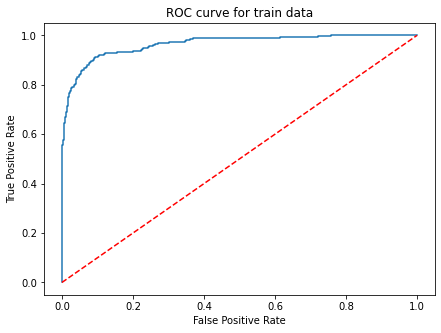

Area Under the curve 0.9643191923677021


In [40]:
# ROC for train data
predict_prob_for_train_data = lg.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, predict_prob_for_train_data)
plot_roc(fpr, tpr, y_train, predict_prob_for_train_data)
# uncomment to see the real data behind the plot
# df = pd.DataFrame({"FalsePositiveRate": fpr, "TruePostiveRate": tpr, "Threshold": thresholds})
# df.style.format("{:.2f}")



### Observations
- best threshold will be in betweemn 0.1 and 0.2

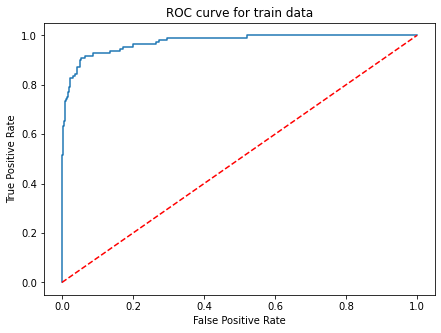

Area Under the curve 0.9732337961585227


In [41]:
# ROC for test data
predict_prob_for_test_data = lg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, predict_prob_for_test_data)
plot_roc(fpr, tpr, y_test, predict_prob_for_test_data)

### Observations
- best threshold will be in betweemn 0.1 and 0.2 and AOC is 97% which is consistent with train data

### Finding optimal threshold

In [42]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"optimal_threshold is {optimal_threshold}")

optimal_threshold is 0.18032405725530876


                 Actual - Yes  Actual - No
Predicted - Yes            99           58
Predicted - No             10         1021
{'test': {'accuracy': 0.9427609427609428,
          'f1_score': 0.7443609022556391,
          'precision': 0.6305732484076433,
          'recall': 0.908256880733945},
 'train': {'accuracy': 0.9401154401154401,
           'f1_score': 0.7233333333333334,
           'precision': 0.6345029239766082,
           'recall': 0.8410852713178295}}


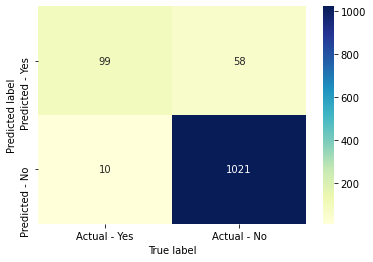

In [43]:
# build model and fit data with optimal threshold=0.18
y_train_optimal = (lg.predict_proba(X_train)[:,1]>=optimal_threshold)
y_test_optimal = (lg.predict_proba(X_test)[:,1]>=optimal_threshold)


# get scrores and print
score_d["threshold_optimal_0.11"] = {"train": {}, "test": {}} 
predict_and_score(lg, X_train, y_train, y_train_optimal, score_d["threshold_optimal_0.11"]["train"])
predict_and_score(lg, X_test, y_test, y_test_optimal, score_d["threshold_optimal_0.11"]["test"], 
                  print_confusion_matrix=True)
pprint.pprint(score_d["threshold_optimal_0.11"])


###Observations
- I got a very good recall score of 90% on my test data for optimal threshold of 0.11

### Now Let's use Precision-Recall curve and see if we can find a better threshold

In [44]:
y_scores=lg.predict_proba(X_train)[:,1]

prec_recal_th_df = pd.DataFrame(precision_recall_curve(y_train, y_scores,), index=["precision", "recall", "threshold"])
prec_recal_th_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

### Observations
- recall is 90% and Precision is 63% when threshold is 0.11. This is equal to optimal threshold I got from ROC curve.

In [45]:
prec_recal_th_df = prec_recal_th_df.T

In [46]:
prec_recal_th_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   precision  2164 non-null   float64
 1   recall     2164 non-null   float64
 2   threshold  2163 non-null   float64
dtypes: float64(3)
memory usage: 50.8 KB


In [47]:
prec_recal_th_df.loc[prec_recal_th_df["precision"]==prec_recal_th_df["recall"], : ]

,precision,recall,threshold
1905,0.775194,0.775194,0.333102


### Let's see this value on plot

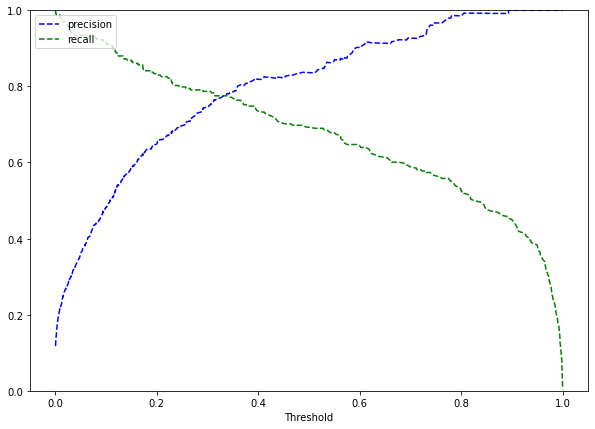

In [48]:
y_scores=lg.predict_proba(X_train)[:,1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

### Observations
- Precision and recall are same at a threshold value of 0.33
- Since our goal is to reduce False Negatives, let's pick a value that is less that 0.33. 
- So I will try by picking 0.25 and see.

In [49]:
lg.predict_proba(X_train)

array([[9.92891523e-01, 7.10847674e-03],
       [9.99542780e-01, 4.57219965e-04],
       [9.97663409e-01, 2.33659143e-03],
       ...,
       [9.82337491e-01, 1.76625087e-02],
       [9.98054736e-01, 1.94526368e-03],
       [9.69103722e-01, 3.08962776e-02]])

                 Actual - Yes  Actual - No
Predicted - Yes            92           45
Predicted - No             17         1034
score for threshold value == 0.25
{'test': {'accuracy': 0.9478114478114478,
          'f1_score': 0.7479674796747968,
          'precision': 0.6715328467153284,
          'recall': 0.8440366972477065},
 'train': {'accuracy': 0.9491341991341992,
           'f1_score': 0.7450271247739602,
           'precision': 0.6983050847457627,
           'recall': 0.7984496124031008}}


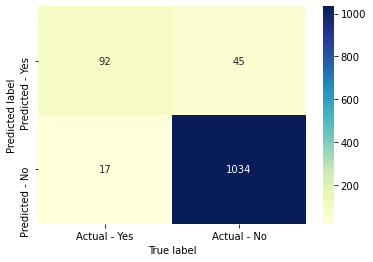

In [53]:
# build model and fit data with threshold=0.25
y_train_25 = (lg.predict_proba(X_train)[:,1]>=0.25)
y_test_25 = (lg.predict_proba(X_test)[:,1]>=0.25)


# get scrores and print
score_d["threshold_0.25"] = {"train": {}, "test": {}}
predict_and_score( X_train, y_train, y_train_25, score_d["threshold_0.25"]["train"])
predict_and_score( X_test, y_test, y_test_25, score_d["threshold_0.25"]["test"], print_confusion_matrix=True)
print("score for threshold value == 0.25")
pprint.pprint(score_d["threshold_0.25"])


In [ ]:
### threshold - 0.33 where both Recall and Precision are equal

                 Actual - Yes  Actual - No
Predicted - Yes            90           32
Predicted - No             19         1047

score for threshold value == 0.33
{'test': {'accuracy': 0.9570707070707071,
          'f1_score': 0.7792207792207793,
          'precision': 0.7377049180327869,
          'recall': 0.8256880733944955},
 'train': {'accuracy': 0.9581529581529582,
           'f1_score': 0.7751937984496124,
           'precision': 0.7751937984496124,
           'recall': 0.7751937984496124}}


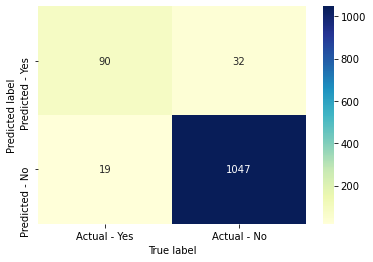

In [54]:
score_d["threshold_0.33"] = {"train": {}, "test": {}}
predict_and_score( X_train, y_train, (lg.predict_proba(X_train)[:,1]>=0.33), score_d["threshold_0.33"]["train"])
predict_and_score( X_test, y_test, (lg.predict_proba(X_test)[:,1]>=0.33), score_d["threshold_0.33"]["test"], 
                  print_confusion_matrix=True)

print("\nscore for threshold value == 0.33")
pprint.pprint(score_d["threshold_0.33"])

### Print all scores in a tabular form

In [55]:
pd.concat({k: pd.DataFrame(v).T for k, v in score_d.items()}, axis=0)

accuracy    recall  precision  f1_score
threshold_0.5          train  0.958514  0.689922   0.835681  0.755839
                       test   0.962963  0.752294   0.828283  0.788462
threshold_optimal_0.11 train  0.940115  0.841085   0.634503  0.723333
                       test   0.942761  0.908257   0.630573  0.744361
threshold_0.25         train  0.949134  0.798450   0.698305  0.745027
                       test   0.947811  0.844037   0.671533  0.747967
threshold_0.33         train  0.958153  0.775194   0.775194  0.775194
                       test   0.957071  0.825688   0.737705  0.779221

### Observations
- For optimal threshold of 0.11 I have a better Recall score is 90%, accuracy is 94% on test data. So far this is the best I could get.

### Finding the coefficients

In [37]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=['coef']).T

,Age,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Graduate,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,county_Butte,county_Contra Costa,county_El Dorado,county_Fresno,county_Humboldt,county_Imperial,county_Kern,county_Lake,county_Los Angeles,county_Marin,county_Mendocino,county_Merced,county_Monterey,county_Napa,county_Orange,county_Placer,county_Riverside,county_Sacramento,county_San Benito,county_San Bernardino,county_San Diego,county_San Francisco,county_San Joaquin,county_San Luis Obispo,county_San Mateo,county_Santa Barbara,county_Santa Clara,county_Santa Cruz,county_Shasta,county_Siskiyou,county_Solano,county_Sonoma,county_Stanislaus,county_Trinity,county_Tuolumne,county_Ventura,county_Yolo
coef,-0.010804,0.064402,0.927326,0.000512,-0.034482,1.42176,0.995181,-0.075672,-4.241434,-0.997051,3.419775,-0.303463,-1.030656,0.025115,0.136017,-0.115302,-0.151355,-0.072188,-0.005654,0.116387,-0.054882,-0.219665,-0.264639,-0.100461,-0.141639,0.097929,-0.000851,-0.424402,-0.149971,0.045915,-0.259165,-0.166346,-0.63879,-0.504415,0.000705,-0.035171,-0.008685,-1.790099,-0.044798,0.197354,-0.267567,-0.075724,-0.09709,0.251383,0.139819,-0.261284,-0.07121,-0.043128,-0.118663,-0.08271


### Coefficient interpretations

* Coefficient of Income, CCAvg, Mortgage, Family of 3 and 4, CD_Account, county_Butte, country_contraCosta, county_Kern, county_Monterey, county_Riverside, county_San Franciscocounty_San Francisco, county_Santa Clara, county_Solano, county_Sonoma  are positive, increase in these will lead to increase in chances of a customer getting a Personal Loan. 
* Coefficient of Age, Family of 2, Graduate and Undergraduates, Securities Account holders, those who use online for transactions, those who hold credit cards from other banks, countys like EL Dorado, Fresno, Humboldt, Imperial, Lake, Los Angeles, Marin, Mendocino, Merced, Napa, Orange, Placer, Sacramento, San Benito, San Bernardino, San Diego, San Joaquin etc are negative, increase in these will lead to decrease in chances of a customer not gettign a Personal Loan.

###  Converting coefficients to odds

**Odds:**
* When coefficient is b , then change in odds is (exp(b)-1)*100 %
* Probability = odd/(1+odd)

In [38]:
odds = (np.exp(lg.coef_[0])-1)*100
pd.set_option('display.max_rows',None)
odds_df = pd.DataFrame(odds, X_train.columns, columns=['odds']).T
odds_df

,Age,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_Graduate,Education_Undergrad,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,county_Butte,county_Contra Costa,county_El Dorado,county_Fresno,county_Humboldt,county_Imperial,county_Kern,county_Lake,county_Los Angeles,county_Marin,county_Mendocino,county_Merced,county_Monterey,county_Napa,county_Orange,county_Placer,county_Riverside,county_Sacramento,county_San Benito,county_San Bernardino,county_San Diego,county_San Francisco,county_San Joaquin,county_San Luis Obispo,county_San Mateo,county_Santa Barbara,county_Santa Clara,county_Santa Cruz,county_Shasta,county_Siskiyou,county_Solano,county_Sonoma,county_Stanislaus,county_Trinity,county_Tuolumne,county_Ventura,county_Yolo
odds,-1.074619,6.652099,152.774104,0.051197,-3.389465,314.44063,170.521423,-7.28802,-98.561305,-63.103426,2956.254287,-26.174302,-64.322714,2.54326,14.570176,-10.890326,-14.04577,-6.96437,-0.563843,12.3431,-5.340303,-19.721262,-23.251721,-9.557958,-13.206572,10.288433,-0.085048,-34.583894,-13.92668,4.698518,-22.830444,-15.324675,-47.206918,-39.614146,0.070487,-3.455935,-0.864766,-83.305628,-4.380968,21.817555,-23.476116,-7.292761,-9.252551,28.580276,15.006597,-22.993788,-6.873409,-4.221096,-11.189302,-7.938206


### Odds sorted in descending order

In [65]:
odds_df.loc[:,[c for c in odds_df if c.startswith('county')]].sort_values(by="odds", ascending=False, axis=1)

,county_Solano,county_Santa Clara,county_Sonoma,county_Contra Costa,county_Kern,county_Monterey,county_Riverside,county_Butte,county_San Francisco,county_Napa,county_Imperial,county_San Luis Obispo,county_San Joaquin,county_Tuolumne,county_Santa Barbara,county_Lake,county_Trinity,county_Humboldt,county_Shasta,county_Yolo,county_Siskiyou,county_Mendocino,county_El Dorado,county_Ventura,county_Merced,county_Placer,county_Fresno,county_San Benito,county_Los Angeles,county_Sacramento,county_Stanislaus,county_Marin,county_Santa Cruz,county_Orange,county_San Diego,county_San Bernardino,county_San Mateo
odds,28.580276,21.817555,15.006597,14.570176,12.3431,10.288433,4.698518,2.54326,0.070487,-0.085048,-0.563843,-0.864766,-3.455935,-4.221096,-4.380968,-5.340303,-6.873409,-6.96437,-7.292761,-7.938206,-9.252551,-9.557958,-10.890326,-11.189302,-13.206572,-13.92668,-14.04577,-15.324675,-19.721262,-22.830444,-22.993788,-23.251721,-23.476116,-34.583894,-39.614146,-47.206918,-83.305628


### Odds sorted in ascending order

In [66]:
odds_df.loc[:,[c for c in odds_df if c.startswith('county')]].sort_values(by="odds", ascending=True, axis=1)

,county_San Mateo,county_San Bernardino,county_San Diego,county_Orange,county_Santa Cruz,county_Marin,county_Stanislaus,county_Sacramento,county_Los Angeles,county_San Benito,county_Fresno,county_Placer,county_Merced,county_Ventura,county_El Dorado,county_Mendocino,county_Siskiyou,county_Yolo,county_Shasta,county_Humboldt,county_Trinity,county_Lake,county_Santa Barbara,county_Tuolumne,county_San Joaquin,county_San Luis Obispo,county_Imperial,county_Napa,county_San Francisco,county_Butte,county_Riverside,county_Monterey,county_Kern,county_Contra Costa,county_Sonoma,county_Santa Clara,county_Solano
odds,-83.305628,-47.206918,-39.614146,-34.583894,-23.476116,-23.251721,-22.993788,-22.830444,-19.721262,-15.324675,-14.04577,-13.92668,-13.206572,-11.189302,-10.890326,-9.557958,-9.252551,-7.938206,-7.292761,-6.96437,-6.873409,-5.340303,-4.380968,-4.221096,-3.455935,-0.864766,-0.563843,-0.085048,0.070487,2.54326,4.698518,10.288433,12.3431,14.570176,15.006597,21.817555,28.580276


### Coefficient interpretations

* Age: 1 unit change in Age will reduce the chance of Personal Loan of a customer defaulting by 1%
* Income: 1 unit change in Income  will increase the chance of of a customer getting Personal Loan by 6.6%
* CCAvg: 1 unit change in Income  will increase the chance of of a customer getting Personal Loan by 153%
* `Interpretation for other attributes can be made similarly.`

* Important features contributing for Personal Loan are
* CD_Account
* Income
* CCAvg
* Family of 3 and 4 
* Countys of Kern, Solano, Sonoma, Monterey


### Since I got the important features from coefficients, I will use them to train my model and check the performance. 
Then I will run Sequential Feature Selector and compare the results

In [56]:
coeff_cols = ["Income", "CCAvg", "Family_3", "Family_4", "Mortgage", "CD_Account_1", "county_Solano", "county_Santa Clara" ]

In [57]:
X_train[coeff_cols]

,Income,CCAvg,Family_3,Family_4,Mortgage,CD_Account_1,county_Solano,county_Santa Clara
2115,23.2,2.4,0,0,147.0,0,0,0
499,13.6,2.2,0,1,0.0,1,0,0
303,24.0,0.5,1,0,0.0,0,0,1
926,20.4,0.3,0,0,0.0,0,0,0
1988,51.4,1.8,0,1,0.0,0,0,1
...,...,...,...,...,...,...,...,...
905,13.6,1.2,0,0,98.0,0,0,0
3839,98.0,6.0,0,0,0.0,0,0,0
1096,40.0,7.5,0,0,0.0,0,0,0
235,12.2,0.9,1,0,0.0,0,0,1


In [58]:
X_train_coeff = X_train[coeff_cols]

#Creating new x_test with the same variables that we selected for x_train
X_test_coeff = X_test[X_train_coeff.columns]

In [59]:
# Create a new logistic regression model.
logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000 
# max_iter indicates number of iteration needed to converge


logreg.fit(X_train_coeff, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.4s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

                 Actual - Yes  Actual - No
Predicted - Yes            61           17
Predicted - No             48         1062
{'test': {'accuracy': 0.9452861952861953,
          'f1_score': 0.6524064171122995,
          'precision': 0.782051282051282,
          'recall': 0.5596330275229358},
 'train': {'accuracy': 0.9361471861471862,
           'f1_score': 0.5912240184757507,
           'precision': 0.7314285714285714,
           'recall': 0.49612403100775193}}


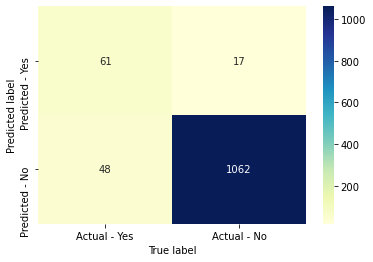

In [60]:

# get scrores and print
score_d["coeff_cols"] = {"train": {}, "test": {}}
predict_and_score( X_train_coeff, y_train, logreg.predict(X_train_coeff), score_d["coeff_cols"]["train"])
predict_and_score( X_test_coeff, y_test, logreg.predict(X_test_coeff), score_d["coeff_cols"]["test"], print_confusion_matrix=True)

pprint.pprint(score_d["coeff_cols"])

### Observations
- Recall score is only 55% when I picked the features based on logloss.

### Sequential Feature Selector

#### Selecting subset of important features using Sequential Feature Selector method

In [62]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [63]:
model = LogisticRegression(solver='newton-cg',n_jobs=-1,random_state=1,max_iter=100)

In [64]:
X_train.shape

(2772, 50)

In [65]:
# we will first build model with all varaible
sfs = SFS(model, k_features=50, forward=True, floating=False, scoring='recall', verbose=2, cv=3,n_jobs=-1)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.0s finished

[2021-05-28 22:40:37] Features: 1/50 -- score: 0.1744186046511628[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    3.1s finished

[2021-05-28 22:40:40] Features: 2/50 -- score: 0.39922480620155043[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    3.1s finished

[2021-05-28 22:40:43] Features: 3/50 -- score: 0.5930232558139535[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  47 out 

In [66]:
# fig1 = plot_sfs(sfs.get_metric_dict(),kind='std_dev',figsize=(12,5))
def plot_sfs_metrics(sfs_mtrics):
    plt.figure(figsize=(20,5))
    plt.xticks(range(0,50))
    plt.ylim(0.1,0.8)
    
    x_keys = sfs_mtrics.keys()
    y_vals = [ val["avg_score"] for val in sfs_mtrics.values()]
    sns.lineplot( x=x_keys, y=y_vals)

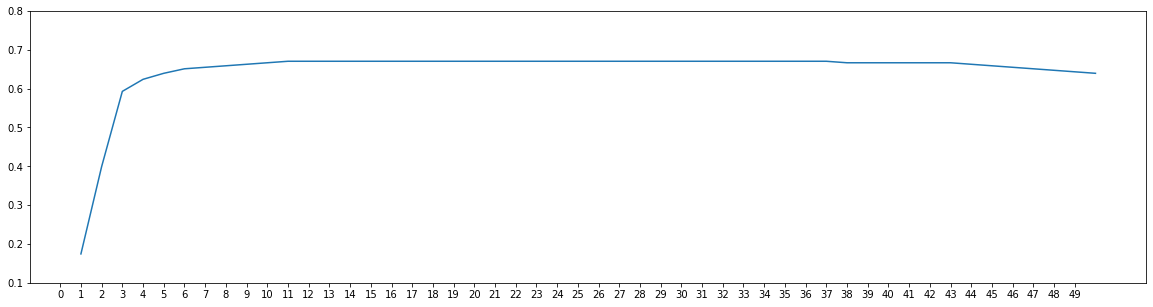

In [67]:
plot_sfs_metrics(sfs.get_metric_dict())

### Observations
- After 10 features there is not chnage in recall score. So I will pick 10 features for this model.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished

[2021-05-28 22:43:13] Features: 1/10 -- score: 0.1744186046511628[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    3.4s finished

[2021-05-28 22:43:16] Features: 2/10 -- score: 0.39922480620155043[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    3.1s finished

[2021-05-28 22:43:19] Features: 3/10 -- score: 0.5930232558139535[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    2.9s finished

[2021-05-28 22:43:22] Feat

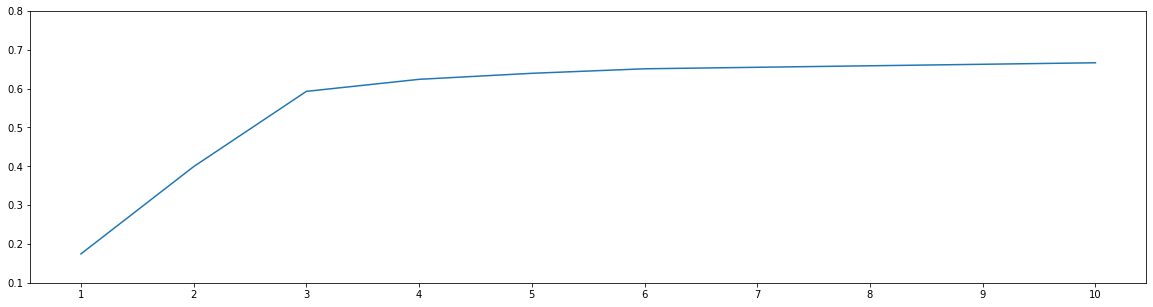

In [68]:
sfs1 = SFS(model, k_features=10, forward=True, floating=False, scoring='recall', verbose=2, cv=3,n_jobs=-1)

sfs1 = sfs1.fit(X_train, y_train)

plot_sfs_metrics(sfs1.get_metric_dict())

### Finding which features are important?

In [69]:
feat_cols = list(sfs1.k_feature_idx_)
feat_cols
print(X_train.columns[feat_cols])

Index(['Age', 'Income', 'CCAvg', 'Family_2', 'Family_3', 'Family_4',
       'Education_Undergrad', 'CD_Account_1', 'county_Kern',
       'county_San Mateo'],
      dtype='object')


### Train the model with the above features and calculate performance metrics

In [70]:
X_train_final = X_train[X_train.columns[feat_cols]]

#Creating new x_test with the same variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [71]:
#Fitting logistic regession model
logreg.fit(X_train_final, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

                 Actual - Yes  Actual - No
Predicted - Yes            81           16
Predicted - No             28         1063
{'test': {'accuracy': 0.9629629629629629,
          'f1_score': 0.7864077669902914,
          'precision': 0.8350515463917526,
          'recall': 0.7431192660550459},
 'train': {'accuracy': 0.9613997113997114,
           'f1_score': 0.7688984881209503,
           'precision': 0.8682926829268293,
           'recall': 0.689922480620155}}


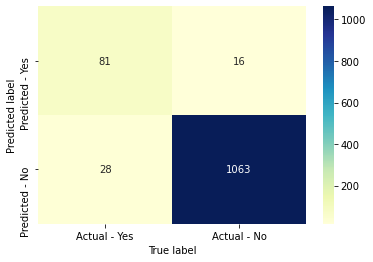

In [72]:

# get scrores and print
score_d["sfs"] = {"train": {}, "test": {}}
predict_and_score( X_train_final, y_train, logreg.predict(X_train_final), score_d["sfs"]["train"])
predict_and_score( X_test_final, y_test, logreg.predict(X_test_final), score_d["sfs"]["test"], print_confusion_matrix=True)

pprint.pprint(score_d["sfs"])

### Observations
- Recall score is 74% on test data when I picked the features from Sequential Feature Selector. This score is better than that of logloss recall score of 55%

### Comparing performance metrics for Logistic Regression.
- Selected optimal threshold of 0.11, with Sequential Feature Selector and with log loss/coeff_columns

In [73]:
pd.concat({k: pd.DataFrame(v).T for k, v in score_d.items() if k in ["threshold_optimal_0.11", "sfs", "coeff_cols"]}, axis=0)

accuracy    recall  precision  f1_score
threshold_optimal_0.11 train  0.940115  0.841085   0.634503  0.723333
                       test   0.942761  0.908257   0.630573  0.744361
coeff_cols             train  0.936147  0.496124   0.731429  0.591224
                       test   0.945286  0.559633   0.782051  0.652406
sfs                    train  0.961400  0.689922   0.868293  0.768898
                       test   0.962963  0.743119   0.835052  0.786408

### Observations
- Recall score 90% was better with my optimal_threshold of 0.11, but it was taking all features into consideration. Will SFS I can limit the number of features to 10 and get a decent recall score of 74%. 
- Again this depends upon the banks threshold value for Loan defaulters.

### Build Decision Tree model

In [76]:
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

                 Actual - Yes  Actual - No
Predicted - Yes            96           12
Predicted - No             13         1067
{'test': {'accuracy': 0.9789562289562289,
          'f1_score': 0.8847926267281107,
          'precision': 0.8888888888888888,
          'recall': 0.8807339449541285},
 'train': {'accuracy': 1.0, 'f1_score': 1.0, 'precision': 1.0, 'recall': 1.0}}


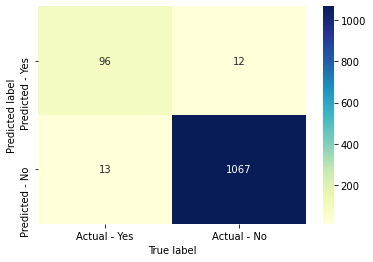

In [108]:
# get scrores and print
score_d["default_decision_tree"] = {"train": {}, "test": {}}
predict_and_score( X_train, y_train, dt_model.predict(X_train), score_d["default_decision_tree"]["train"])
predict_and_score( X_test, y_test, dt_model.predict(X_test), score_d["default_decision_tree"]["test"], print_confusion_matrix=True)

pprint.pprint(score_d["default_decision_tree"])

### Observations
- Recall score on test data is 88% on default decision tree model without any pruning.

## Visualizing the Decision Tree

In [80]:
feature_names=list(X_train.columns)

In [100]:
def plot_decision_tree(model, features):
    plt.figure(figsize=(20,30))

    out = tree.plot_tree(model,feature_names=features,
                         filled=True,fontsize=9,node_ids=True,class_names=True)
    for o in out:
         arrow = o.arrow_patch
         if arrow is not None:
            arrow.set_edgecolor('black')
            arrow.set_linewidth(1)
    plt.show()

In [101]:
# Text report showing the rules of a decision tree -
def print_decision_tree_in_txt(model, features):
    print(tree.export_text(model,feature_names=features,show_weights=True))

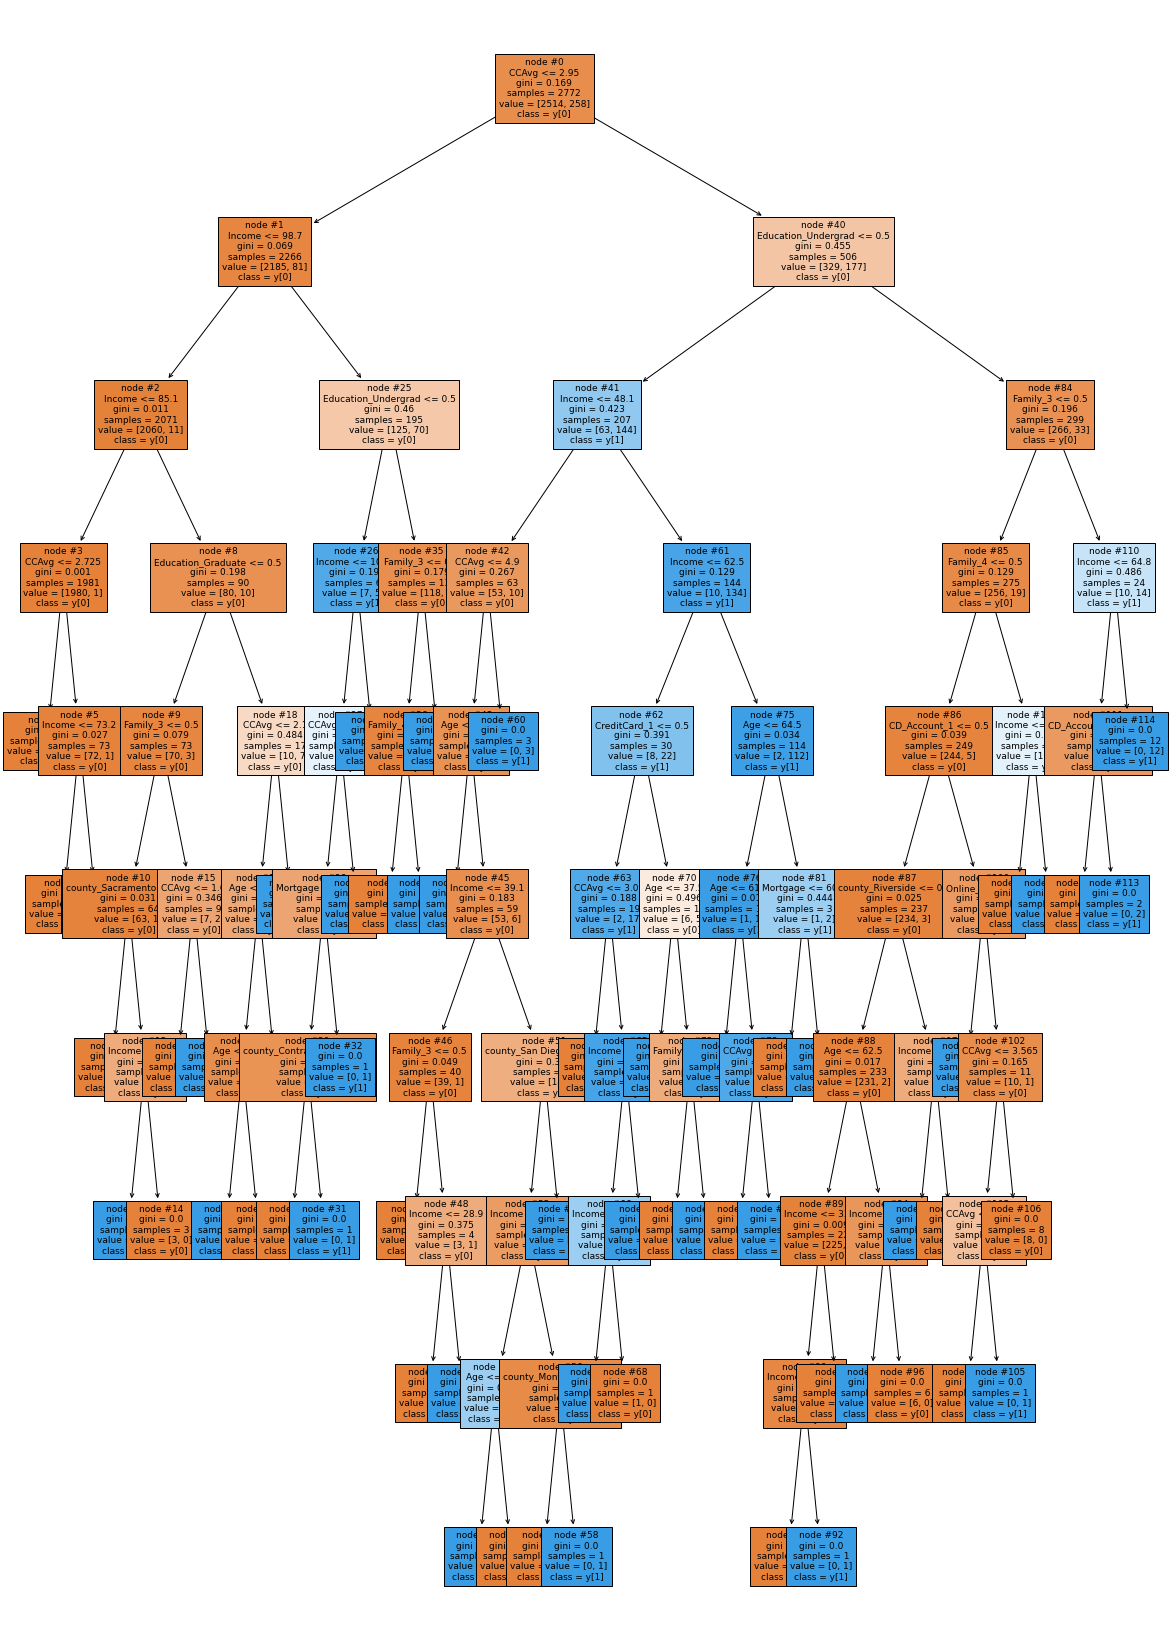

In [102]:
plot_decision_tree(dt_model, feature_names)

In [103]:
print_decision_tree_in_txt(dt_model, feature_names)

|--- CCAvg <= 2.95
|   |--- Income <= 98.70
|   |   |--- Income <= 85.10
|   |   |   |--- CCAvg <= 2.73
|   |   |   |   |--- weights: [1908.00, 0.00] class: 0
|   |   |   |--- CCAvg >  2.73
|   |   |   |   |--- Income <= 73.20
|   |   |   |   |   |--- weights: [72.00, 0.00] class: 0
|   |   |   |   |--- Income >  73.20
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |--- Income >  85.10
|   |   |   |--- Education_Graduate <= 0.50
|   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |--- county_Sacramento <= 0.50
|   |   |   |   |   |   |--- weights: [60.00, 0.00] class: 0
|   |   |   |   |   |--- county_Sacramento >  0.50
|   |   |   |   |   |   |--- Income <= 87.90
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Income >  87.90
|   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |--- Family_3 >  0.50
|   |   |   |   |   |--- CCAvg <= 1.60
|   |   |   |   |   |   |--- weights: [7.00, 0.00] cla

### Getting Important features from the complete decision tree 

In [104]:
def plot_important_features(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(12,12))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

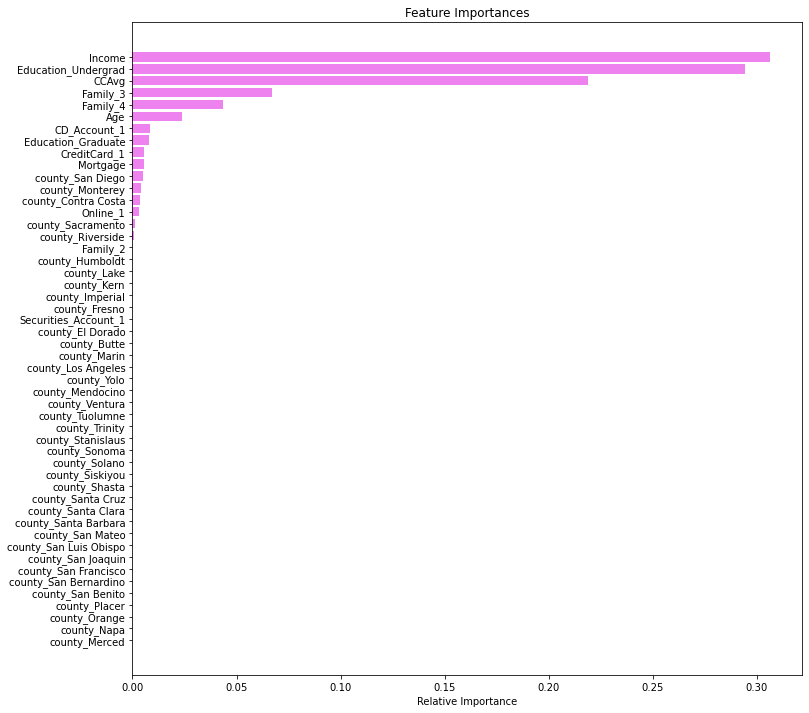

In [98]:
plot_important_features(dt_model, feature_names)

### Observations
- Income, Undergraduate customers, Family of 3 and 4, Age, CD account holders, Graduate customers etc are some of the important features.

### Using GridSearch for Hyperparameter tuning of our tree model  (Pre Pruning)
* Let's see if we can improve our model performance even more.

In [84]:
# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [5, 10,15,20,25,30],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dt_model, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=20,
                       min_impurity_decrease=0.001, random_state=1)

### Using out best model from gridSearch, calculate the performance metrics

                 Actual - Yes  Actual - No
Predicted - Yes            94            6
Predicted - No             15         1073
{'test': {'accuracy': 0.9823232323232324,
          'f1_score': 0.8995215311004784,
          'precision': 0.94,
          'recall': 0.8623853211009175},
 'train': {'accuracy': 0.9873737373737373,
           'f1_score': 0.9301397205588823,
           'precision': 0.9588477366255144,
           'recall': 0.9031007751937985}}


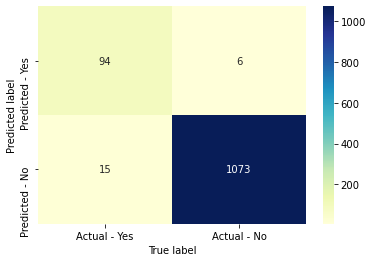

In [107]:
# get scrores and print for t
score_d["decision_tree_pre_pruning"] = {"train": {}, "test": {}}
predict_and_score( X_train, y_train, estimator.predict(X_train), score_d["decision_tree_pre_pruning"]["train"])
predict_and_score( X_test, y_test, estimator.predict(X_test), 
                  score_d["decision_tree_pre_pruning"]["test"], print_confusion_matrix=True)

pprint.pprint(score_d["decision_tree_pre_pruning"])

### Observations
- Recall score has reduced to 86% compared to the previous decision tree model. But the tree depth has reduced to almost half
- I would pick the second one compared to the first one.

### Visualize decision tree

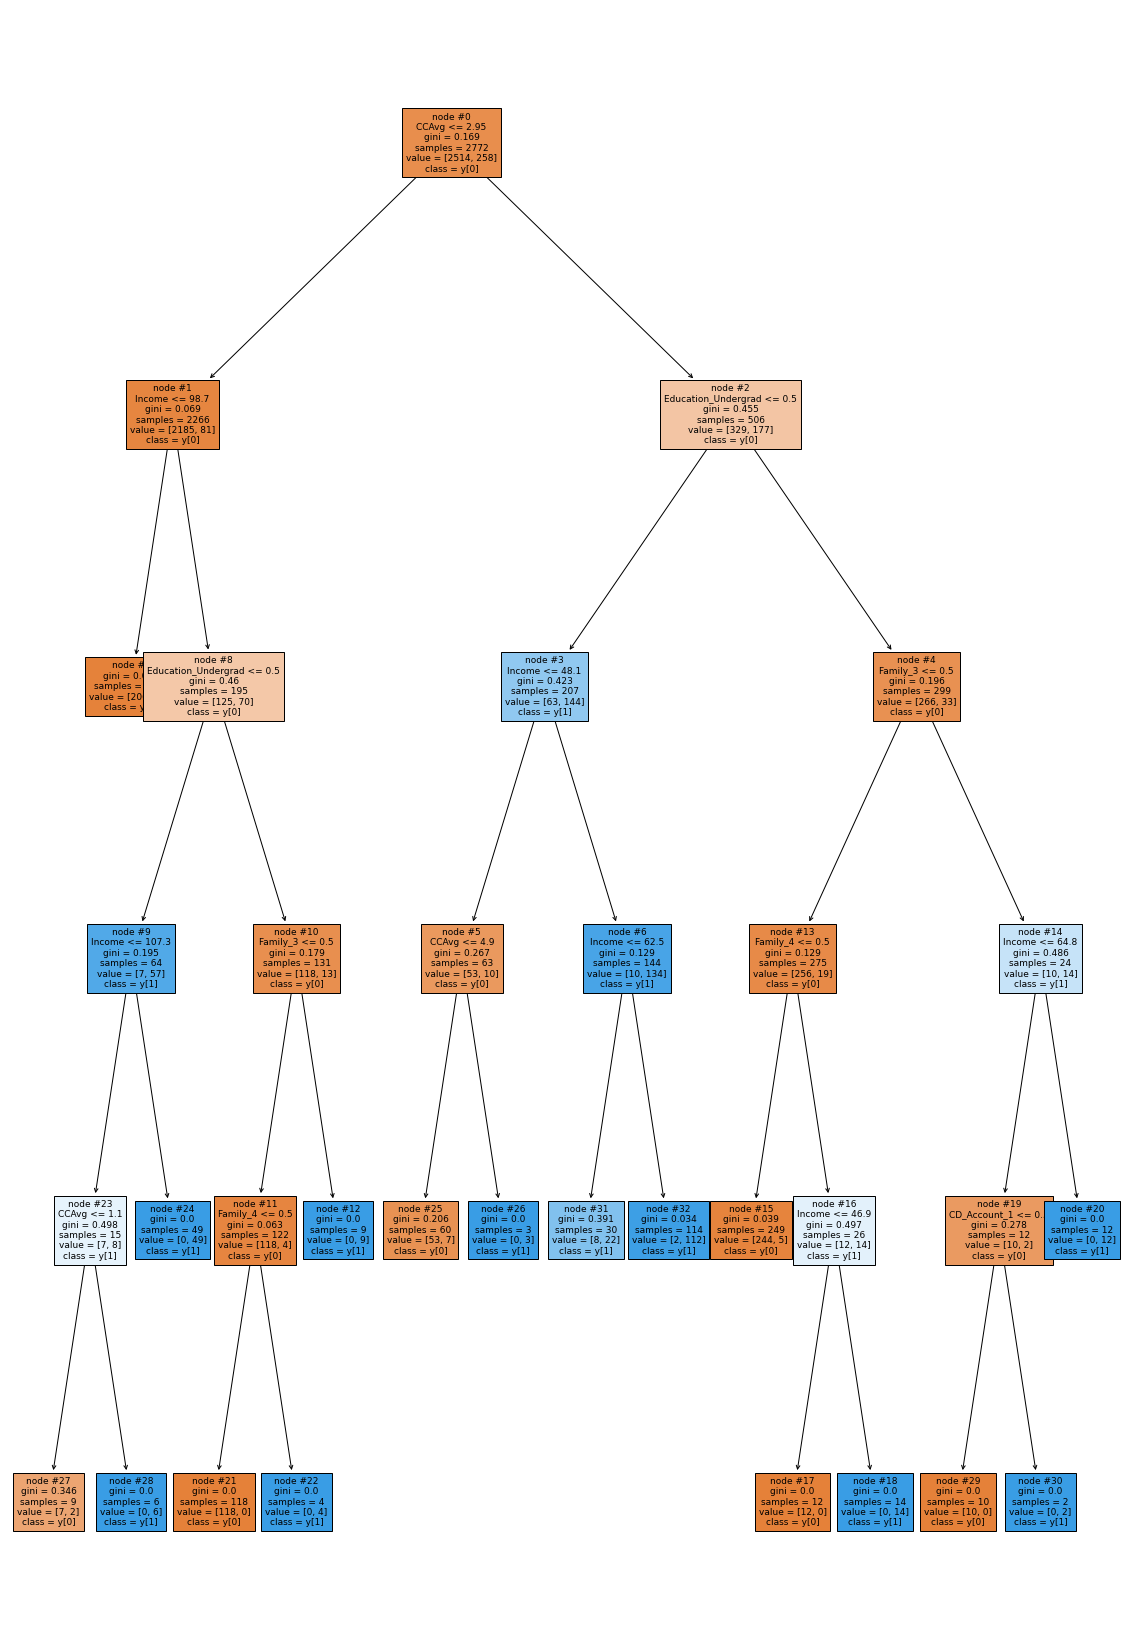

In [105]:
plot_decision_tree(estimator, feature_names)

In [106]:
print_decision_tree_in_txt(estimator, feature_names)

|--- CCAvg <= 2.95
|   |--- Income <= 98.70
|   |   |--- weights: [2060.00, 11.00] class: 0
|   |--- Income >  98.70
|   |   |--- Education_Undergrad <= 0.50
|   |   |   |--- Income <= 107.30
|   |   |   |   |--- CCAvg <= 1.10
|   |   |   |   |   |--- weights: [7.00, 2.00] class: 0
|   |   |   |   |--- CCAvg >  1.10
|   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |--- Income >  107.30
|   |   |   |   |--- weights: [0.00, 49.00] class: 1
|   |   |--- Education_Undergrad >  0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [118.00, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.00, 4.00] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [0.00, 9.00] class: 1
|--- CCAvg >  2.95
|   |--- Education_Undergrad <= 0.50
|   |   |--- Income <= 48.10
|   |   |   |--- CCAvg <= 4.90
|   |   |   |   |--- weights: [53.00, 7.00] class: 0
|   |   |   |--- CC

### Lets Plot important features that this model picked.

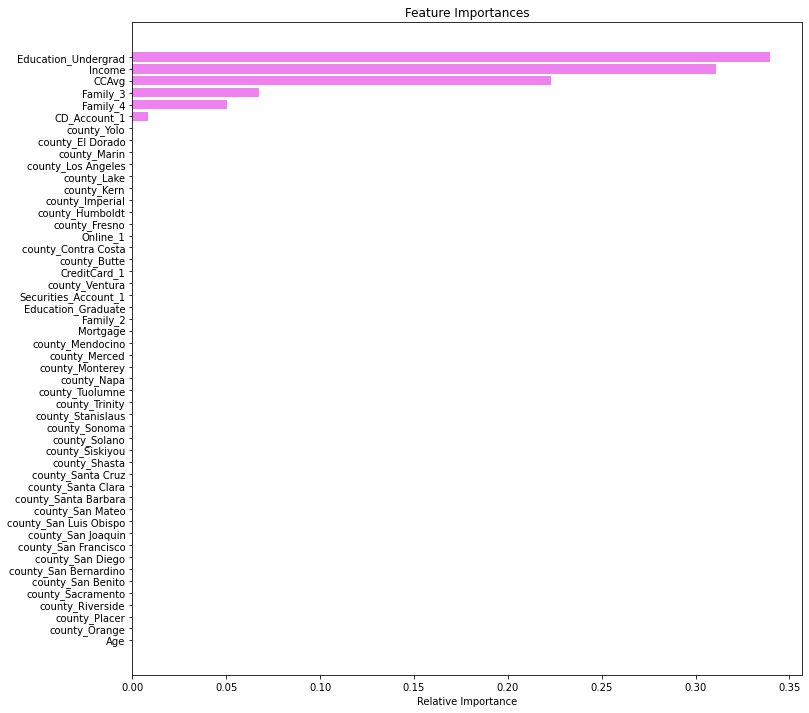

In [99]:
plot_important_features(estimator, feature_names)

### Observations
- Now Important features have reduced to Undergraduates, Income, CCAvg, Family of 3 and 4 and customers with CD account.

## Cost Complexity Pruning (Post Pruning)

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

### Since the input data creates an unbalanced classification model I am adding weighths to the model to balance it.

In [112]:

df_model_wgt = DecisionTreeClassifier(random_state=1,class_weight = {0:0.10,1:0.90})
path = df_model_wgt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [115]:
### Plot ccp_alphas vrs impurities

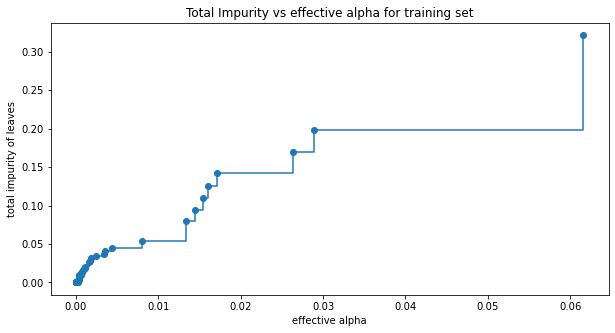

In [114]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

### Next, we train a decision tree using the effective alphas. 
- We are going to add ccp_alpha as a parameter to DecisionTreeClassifier

In [131]:
df_model_wgt_l = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.10,1:0.90})
    clf.fit(X_train, y_train)
    df_model_wgt_l.append(clf)

In [132]:
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      df_model_wgt_l[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.06157751240080166


### Visualize number of nodes vrs ccp_alpha and depth of tree vrs ccp_alpha
- As ccp_alpha increases, number of nodes and depth of tree decreases

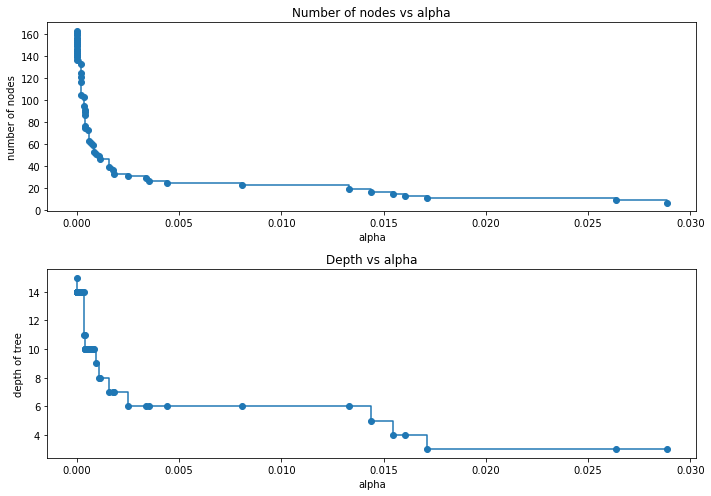

In [133]:
df_model_wgt_l = df_model_wgt_l[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in df_model_wgt_l]
depth = [clf.tree_.max_depth for clf in df_model_wgt_l]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Observations
- For a ccp_alpha between 0.01 and 0.02, the number of nodes and depth of tree came down to a resonable limit.
- Lets score the models and figure out the best alpha

In [134]:
def ccp_alpha_recall_score(list_of_models, X_data, y_data, score_l):
    for clf in list_of_models:
        values_train=metrics.recall_score(y_data, clf.predict(X_data))
        score_l.append(values_train)

In [135]:
ccp_alpha_scores = {"train": [], "test":[]}
ccp_alpha_recall_score(df_model_wgt_l, X_train, y_train, ccp_alpha_scores["train"])
ccp_alpha_recall_score(df_model_wgt_l, X_test, y_test, ccp_alpha_scores["test"])

In [126]:
ccp_alpha_scores

{'train': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9961240310077519,
  0.9961240310077519,
  0.9961240310077519,
  0.9844961240310077,
  0.9844961240310077,
  0.9806201550387597,
  0.9844961240310077,
  0.9612403100775194,
  0.9612403100775194,
  0.9651162790697675,
  0.9651162790697675,
  0.9534883720930233,
  0.9534883720930233,
  0.9534883720930233,
  0.9534883720930233,
  0.8023255813953488,
  0.8643410852713178,
  0.8643410852713178,
  0.9922480620155039],
 'test': [0.8715596330275229,
  0.8715596330275229,
  0.8715596330275229,
  0.8715596330275229,
  0.8715596330275229,
  0.8715596330275229,
  0.8715596330275229,
  0.8715596330275229,
  0.8715596330275229,
  0.8715596330275229,
  0.8715596330275229,
  0.8715596330275229,
  0.8715596330275229,
  0.8715596330275229,
  0.8715596330275229,
  0.8715596330275

### Plot ccp_alpha_scores

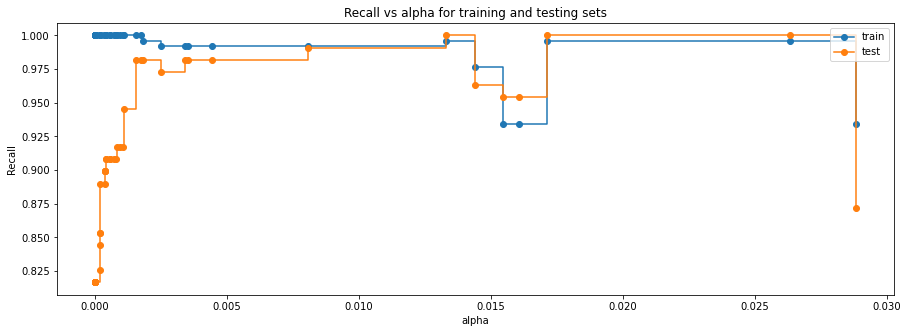

In [136]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, ccp_alpha_scores["train"], marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, ccp_alpha_scores["test"], marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [137]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(ccp_alpha_scores["test"])
best_model = df_model_wgt_l[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.01330638262822032,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)


### Observations
- ccp_alpha of 0.01 has a maximum recall score. Let's use that to train and test our model.

In [138]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01330638262822032,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)

                 Actual - Yes  Actual - No
Predicted - Yes           109          129
Predicted - No              0          950
{'test': {'accuracy': 0.8914141414141414,
          'f1_score': 0.6282420749279539,
          'precision': 0.4579831932773109,
          'recall': 1.0},
 'train': {'accuracy': 0.9040404040404041,
           'f1_score': 0.658974358974359,
           'precision': 0.49233716475095785,
           'recall': 0.9961240310077519}}


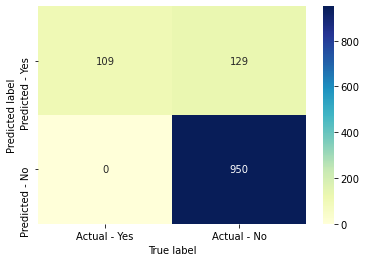

In [139]:
# get scrores and print 
score_d["decision_tree_post_pruning"] = {"train": {}, "test": {}}
predict_and_score( X_train, y_train, best_model.predict(X_train), score_d["decision_tree_post_pruning"]["train"])
predict_and_score( X_test, y_test, best_model.predict(X_test), 
                  score_d["decision_tree_post_pruning"]["test"], print_confusion_matrix=True)

pprint.pprint(score_d["decision_tree_post_pruning"])

### Observations
- Post Pruning best model has the recall score of 100%. 

### Visualize decision tree

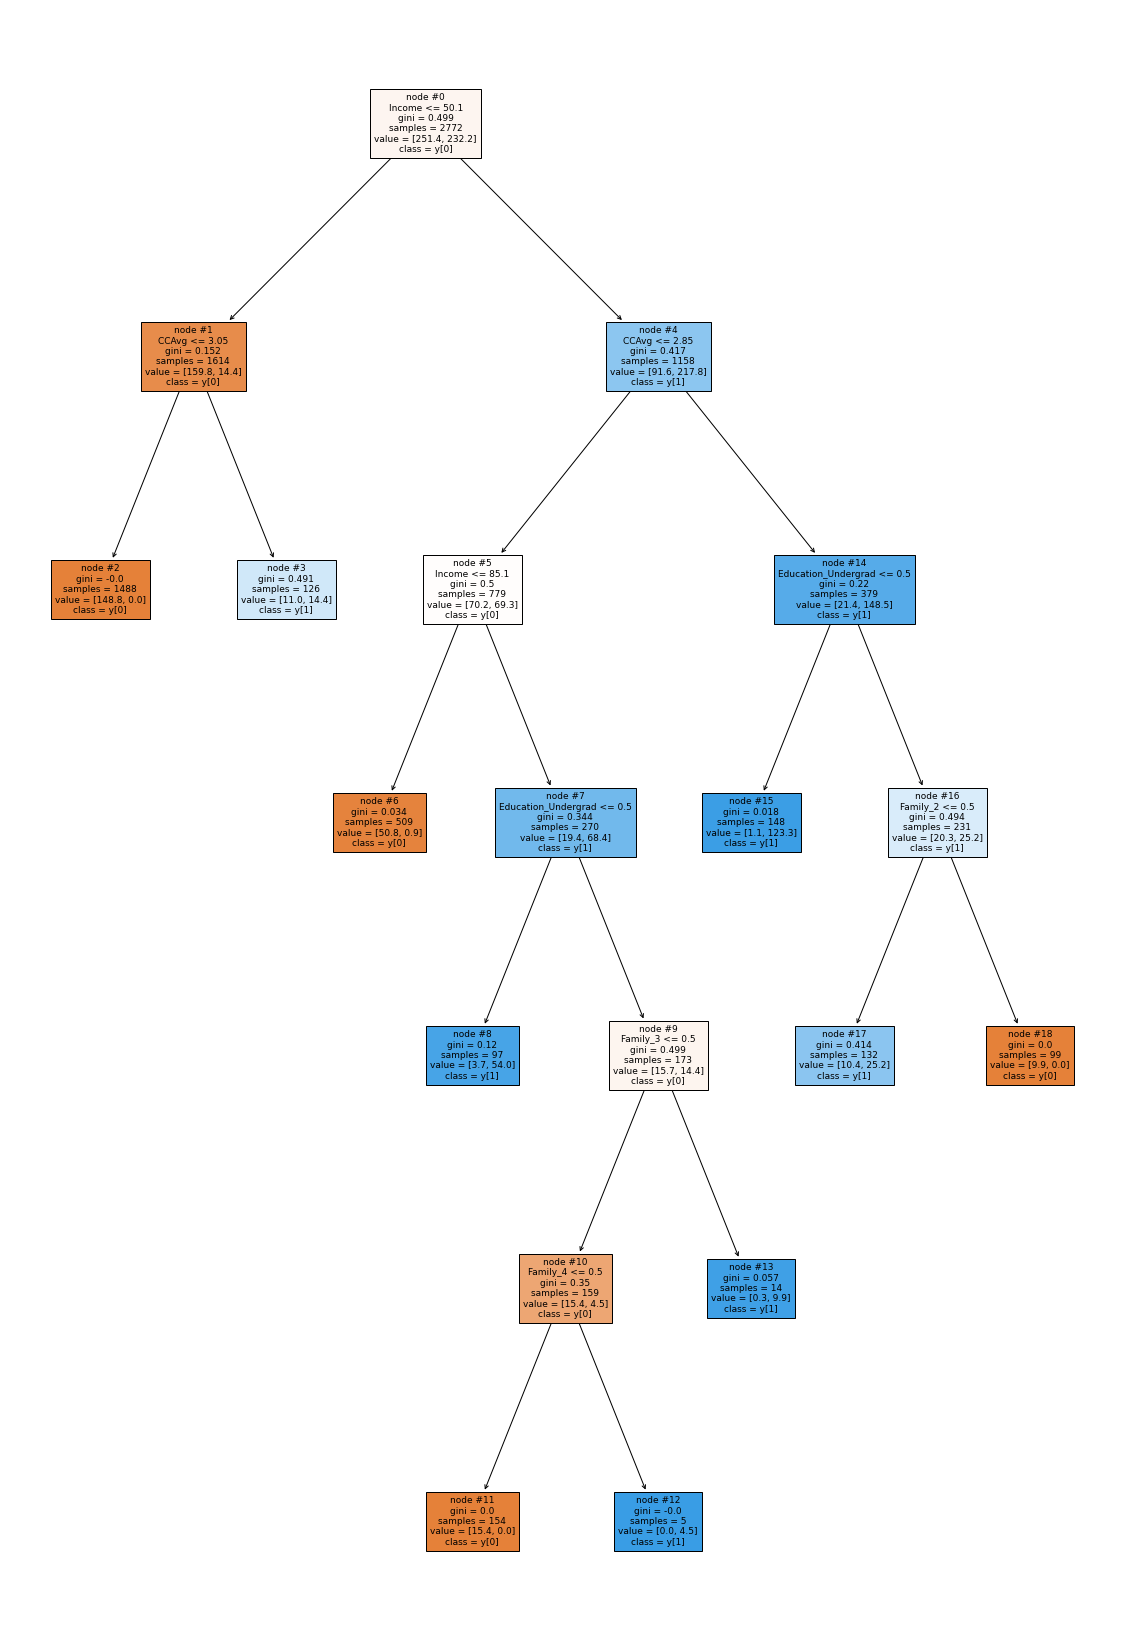

In [140]:
plot_decision_tree(best_model, feature_names)

In [141]:
print_decision_tree_in_txt(best_model, feature_names)

|--- Income <= 50.10
|   |--- CCAvg <= 3.05
|   |   |--- weights: [148.80, 0.00] class: 0
|   |--- CCAvg >  3.05
|   |   |--- weights: [11.00, 14.40] class: 1
|--- Income >  50.10
|   |--- CCAvg <= 2.85
|   |   |--- Income <= 85.10
|   |   |   |--- weights: [50.80, 0.90] class: 0
|   |   |--- Income >  85.10
|   |   |   |--- Education_Undergrad <= 0.50
|   |   |   |   |--- weights: [3.70, 54.00] class: 1
|   |   |   |--- Education_Undergrad >  0.50
|   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |--- weights: [15.40, 0.00] class: 0
|   |   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 4.50] class: 1
|   |   |   |   |--- Family_3 >  0.50
|   |   |   |   |   |--- weights: [0.30, 9.90] class: 1
|   |--- CCAvg >  2.85
|   |   |--- Education_Undergrad <= 0.50
|   |   |   |--- weights: [1.10, 123.30] class: 1
|   |   |--- Education_Undergrad >  0.50
|   |   |   |--- Family_2 <= 0.50
|   |   |   |   |--- 

### Lets Plot important features that this model picked.

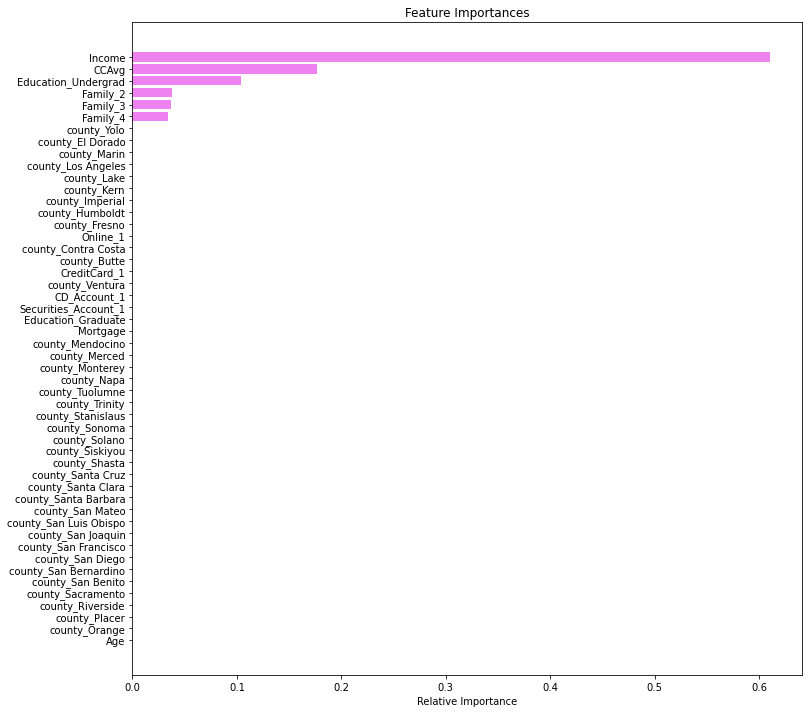

In [143]:
plot_important_features(best_model, feature_names)

### Observations
- Now Important features have reduced to Income, CCAvg, Undergraduates, Family of 2, 3 and 4.

### Comparing all the decision tree models

In [144]:
pd.concat({k: pd.DataFrame(v).T for k, v in score_d.items() if k in ["default_decision_tree", "decision_tree_pre_pruning", "decision_tree_post_pruning"]}, axis=0)

accuracy    recall  precision  f1_score
decision_tree_pre_pruning  train  0.987374  0.903101   0.958848  0.930140
                           test   0.982323  0.862385   0.940000  0.899522
default_decision_tree      train  1.000000  1.000000   1.000000  1.000000
                           test   0.978956  0.880734   0.888889  0.884793
decision_tree_post_pruning train  0.904040  0.996124   0.492337  0.658974
                           test   0.891414  1.000000   0.457983  0.628242

### Observations
- decision tree with post pruning gives 100% recall score. But this adds complexity to the model computation,
- Since the decision tree with pre pruning 86% is almost close to default decision tree 88%, I would pick it.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- According to decision tree algorithm important feature that affect he Personal Loan are Undergraduates, Income, CCAvg, Family of 3 and 4 and customers with CD account. This almost close to Logistic regression model except that countys were not picked.


### Conclusion
- We have been able to build a predictive model that can be used by the All Life Bank to traget the customers for Personal Loan. For this I am picking a model that gives 74% on call scores and accuracy of 96%.
- We found that Age, Income, CCAvg, Family of 2,3 and 4, Undergraduates, CD_Account holders, People from countys of Kern and San Mateo are significant predictors of Personal Loan.
- Coefficient of Income, CCAvg, Mortgage, Family of 3 and 4, CD_Account, county_Butte, country_contraCosta, county_Kern, county_Monterey, county_Riverside, county_San Franciscocounty_San Francisco, county_Santa Clara, county_Solano, county_Sonoma  are positive, increase in these will lead to increase in chances of a customer getting a Personal Loan. 
- Coefficient of Age, Family of 2, Graduate and Undergraduates, Securities Account holders, those who use online for transactions, those who hold credit cards from other banks, countys like EL Dorado, Fresno, Humboldt, Imperial, Lake, Los Angeles, Marin, Mendocino, Merced, Napa, Orange, Placer, Sacramento, San Benito, San Bernardino, San Diego, San Joaquin etc are negative, increase in these will lead to decrease in chances of a customer not gettign a Personal Loan. 

### Recommondations

- Customers with higher Income spends more on credit cards and takes higher Mortage loans. These customers like to spend a lot and are good candidate for Personal Loan.
- Existing customers with certificate of deposit (CD) account with the bank tend to take Personal Loans from the bank itself. These are our valued customers and ideally there will be minimum risk in giving them Personal Loan. We can provide incentives to them by offering package deals with low interest rates.
- Customers with a family of three and four generally have higher expenditure than a family of one and two. We can send pre-approved mails to these customers frequently.
- Young customers and Undergraduates are also good candidates for Personal Loan. However we should be catious about givign loans to them. We can look for other supporting factors like Income, Credit Card spendings, Certificated of Deposit etc. 
- Top five countys to target for campaigns are Solano, Santa Clara, Sonoma, Contra Costa and Kern.
- Worst five countys to target for campaigns are San Mateo, San Bernardino, San Diego, Orange and Santa Cruz.